# 프로젝트 : 서울시 공공자전거 대여소 시간별 수요 예측 모델 개발

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 전처리!

**데이터셋 출처**
자전거 대여 데이터 출처 : [자전거 대여 데이터 링크](https://data.seoul.go.kr/dataList/OA-15182/F/1/datasetView.do)

날씨 데이터 출처 : [날씨 데이터 링크](https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36)

아래 스크린샷과 같이 기간 설정 및 온도와 습도 데이터 추출하여 사용함.
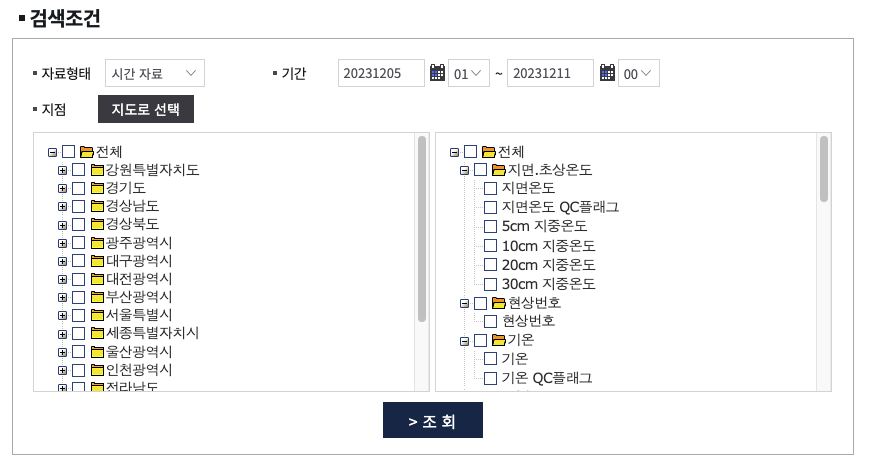
data load & 병합

In [3]:
#Data read
df = pd.read_csv('/content/drive/MyDrive/temproject/서울특별시 공공자전거 대여이력 정보_2305.csv',encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/temproject/서울특별시 공공자전거 대여이력 정보_2306.csv',encoding='cp949')
concatenated_df = pd.concat([df, df2], ignore_index=True)

목표하는 위치 라벨 찾기 위한 key값 출력( 여의나루 대여소 )

In [4]:
all_stations = concatenated_df["대여 대여소명"].unique()

# 결과 출력
for station in all_stations:
    print(station)

잠실3거리(갤러리아팰리스)
레베쌍트 빌딩 앞
둔촌사거리
석계역 문화광장 내 자전거 보관소
석관래미안아트리치
강서구립등빛도서관
관악구시설관리공단
을지로3가역 3번출구
군자역 비채온 오피스텔
녹천역 1번출구 앞
양천향교역8번출구
대방지하보도(대방동경남아너스빌아파트)
청계벽산아파트 앞
수색역
혜화역 3번출구 뒤
부엉이공원 앞
수연빌딩 앞
강일동 리슈빌 빌딩앞
강북문화정보도서관
베네스트 오피스텔 앞
개화산역 2번 출구
종로3가역 8번출구
오목교역 6번 출구
망원역 1번출구 앞
잠실 자전거 수리센터 앞
해담는다리
건대병원후문
이수역 1번출구
효성인텔리안 앞
서울대입구역 5번출구
우이초등학교 후문 옆
오목교역 7번출구 앞
금천구청 앞 자전거거치대
강남구청역 2번출구 뒤
강동역3번출구
마곡엠밸리14단지 버스정류장(마곡엠밸리11,12단지상가방면)
대흥역 1번출구
이앤씨드림타워 앞
화곡터널입구교차로
광진광장
아차산역 3번출구
영등포역5번출구
숭인2동 주민센터 입구
종암동 동덕여대 제2생활관 앞
영등포시장역 포레나영등포
봉천역 4번출구
화곡역 1번 출구 앞
도심공항타워 앞
반포종합운동장
상계동 우방유쉘아파트 앞
신당역 10번 출구
북한산 한신휴플러스APT앞
몽촌토성역 1번출구 옆
신트리공원 입구
마곡역 7번출구
동문굿모닝탑
태릉입구역 5번출구
대청역
온수역 2번 출구 앞
염창동 새마을금고 건너편
가좌역1 번출구 앞
길동 마루빌딩
월계초안아파트 1단지
성신여대입구역 5번출구
신도림역 1번 출구 앞
자양나들목
역촌파출소
맥도날드 서울둔촌DT점 앞
종로타워빌딩
상봉시장앞 교차로 한성빌딩 앞
광운대역 앞
남부터미널역 1번출구
마곡금호어울림아파트
극동방송국 앞
상계주공2단지 버스정류장 옆
종각역 1번출구 앞
7번가피자 서교망원점
양천공영차고지
등촌5단지아파트 버스정류장
DDP 패션몰
자양사거리 광진아크로텔 앞
그랜드아이파크아파트 앞
공릉역 1번 출구 앞
마곡역 버스정류장(마곡나루역1번출구, 웰튼병원 방면)
래미안강남힐즈 사거리
문정동 근린공원
보라매역 8번출구
대한상공회의소
태릉입구역 

여의나루역 1번출구 앞 데이터만 선별

In [5]:
filtered_df = concatenated_df[concatenated_df["대여 대여소명"] == "여의나루역 1번출구 앞"]

In [6]:
filtered_df

자전거번호                 대여일시  대여 대여소번호       대여 대여소명  대여거치대  \
621       SPB-51572  2023-05-01 00:07:58       207  여의나루역 1번출구 앞      0   
3299      SPB-50709  2023-05-01 00:10:21       207  여의나루역 1번출구 앞      0   
3323      SPB-50822  2023-05-01 00:10:17       207  여의나루역 1번출구 앞      0   
3334      SPB-66637  2023-05-01 00:18:55       207  여의나루역 1번출구 앞      0   
3343      SPB-60322  2023-05-01 00:16:17       207  여의나루역 1번출구 앞      0   
...             ...                  ...       ...           ...    ...   
10188878  SPB-35592  2023-06-30 22:48:34       207  여의나루역 1번출구 앞      0   
10189060  SPB-30832  2023-06-30 23:37:54       207  여의나루역 1번출구 앞      0   
10189119  SPB-57971  2023-06-30 23:54:46       207  여의나루역 1번출구 앞      0   
10189229  SPB-68509  2023-06-30 23:54:49       207  여의나루역 1번출구 앞      0   
10189390  SPB-34373  2023-06-30 23:25:55       207  여의나루역 1번출구 앞      0   

                         반납일시 반납대여소번호             반납대여소명 반납거치대  이용시간(분)  \
621       2023-05-01 00:27:37   02058              동작경찰서     0       19   
3299      2023-05-01 01:48:44   01152             마곡역교차로     0       98   
3323      2023-05-01 01:49:50   01157               강서구청     0       99   
3334      2023-05-01 01:50:10   00207       여의나루역 1번출구 앞     0       91   
3343      2023-05-01 01:50:51   00207       여의나루역 1번출구 앞     0       94   
...                       ...     ...                ...   ...      ...   
10188878  2023-07-01 00:26:31   01210  롯데월드타워(잠실역2번출구 쪽)     0       98   
10189060  2023-07-01 00:35:57   05859          여의도 삼부아파트     0       58   
10189119  2023-07-01 00:39:41   00263          근로자회관 사거리     0       44   
10189229  2023-07-01 00:49:12   00260       여의도 마리나선착장 앞     0       54   
10189390  2023-07-01 01:21:27   00781          신정보도육교 아래     0      115   

           이용거리(M)    생년  성별 이용자종류 대여대여소ID  반납대여소ID  
621        3863.23  2001   M   내국인   ST-73  ST-1150  
3299      12090.00  2000   F   내국인   ST-73  ST-1064  
3323      13180.68    \N   F   내국인   ST-73  ST-1069  
3334       9230.00  1994   F   내국인   ST-73    ST-73  
3343       9600.00  1993   M   내국인   ST-73    ST-73  
...            ...   ...  ..   ...     ...      ...  
10188878  18058.38  1990   M   내국인   ST-73   ST-891  
10189060   5159.44    \N  \N   외국인   ST-73  ST-3160  
10189119  11320.03  2000   M   내국인   ST-73   ST-417  
10189229   2530.00  2000   M   내국인   ST-73   ST-414  
10189390  12041.91    \N  \N   비회원   ST-73  ST-2007  

[30721 rows x 16 columns]

공휴일 사전 지정

In [7]:
holidays = [
        '2023-05-05', '2023-05-06', '2023-05-07', '2023-05-13', '2023-05-14',
        '2023-05-20', '2023-05-21', '2023-05-27', '2023-05-28', '2023-05-29',
        '2023-06-03', '2023-06-04', '2023-06-06', '2023-06-10', '2023-06-11',
        '2023-06-17', '2023-06-18', '2023-06-24', '2023-06-25']

# 해당 날짜가 공휴일인지 여부 확인하는 함수
# 공휴일 = 0 / 평일이면 1
def is_holiday(date_obj):
    if(date_obj.strftime('%Y-%m-%d') in holidays):
        return 1
    else:
        return 0


데이터 재구성

단, 현재 재구성된 데이터에는 대여 건수가 존재하는 데이터에 관해서만 정의되어 있어, 추가적인 해결이 필요함.

아래에서 이와 관련된 전처리 진행됨.

In [8]:
train_df = pd.DataFrame(filtered_df['대여일시'])

In [9]:
df = pd.DataFrame(train_df)

# "대여일시" 컬럼을 datetime 형식으로 변환
df['대여일시'] = pd.to_datetime(df['대여일시'])

# "월", "일", "시간대" 컬럼 추가
df['월'] = df['대여일시'].dt.month
df['일'] = df['대여일시'].dt.day
df['시간대'] = df['대여일시'].dt.hour
df['공휴일여부'] = df['대여일시'].apply(is_holiday)
# 월별, 일별, 시간대별 대여 건수 계산
train_set = df.groupby(['월', '일', '시간대','공휴일여부']).size().reset_index(name='대여건수')
train_set

월   일  시간대  공휴일여부  대여건수
0     5   1    0      0     5
1     5   1    2      0     2
2     5   1    7      0     3
3     5   1    8      0    10
4     5   1    9      0    12
...  ..  ..  ...    ...   ...
1279  6  30   19      0    26
1280  6  30   20      0    28
1281  6  30   21      0    44
1282  6  30   22      0    31
1283  6  30   23      0    17

[1284 rows x 5 columns]

공휴일이 제대로 반영되었는지 확인 및 비율 확인

In [10]:
train_set['공휴일여부'].value_counts()

0    918
1    366
Name: 공휴일여부, dtype: int64

위에서 언급한대로 대여 건수가 없는 데이터를 추가한 새로운 데이터셋 생성

In [11]:
import pandas as pd
import numpy as np

# 새로운 데이터프레임 생성
all_combinations = pd.MultiIndex.from_product([range(5, 6), range(1, 32), range(24)], names=['월', '일', '시간대'])
all_combinations2 = pd.MultiIndex.from_product([range(6, 7), range(1, 31), range(24)], names=['월', '일', '시간대'])

new_df = pd.DataFrame(index=all_combinations).reset_index()
new_df2 = pd.DataFrame(index=all_combinations2).reset_index()

new_df['공휴일여부'] = np.nan
new_df['대여건수'] = np.nan
new_df2['공휴일여부'] = np.nan
new_df2['대여건수'] = np.nan

# print(new_df)
# print(new_df2)
Final_df= pd.concat([new_df, new_df2], ignore_index=True)

for i in range(len(train_set['월'])):
    month = train_set['월'][i]
    day = train_set['일'][i]
    time = train_set['시간대'][i]
    count = train_set['대여건수'][i]
    holy = train_set['공휴일여부'][i]
    Final_df.loc[
        (Final_df['월'] == month) &
        (Final_df['일'] == day) &
        (Final_df['시간대'] == time), '대여건수'] = count
    Final_df.loc[
        (Final_df['월'] == month) &
        (Final_df['일'] == day), '공휴일여부'] = holy

Final_df.fillna(0, inplace=True)
Final_df



월   일  시간대  공휴일여부  대여건수
0     5   1    0    0.0   5.0
1     5   1    1    0.0   0.0
2     5   1    2    0.0   2.0
3     5   1    3    0.0   0.0
4     5   1    4    0.0   0.0
...  ..  ..  ...    ...   ...
1459  6  30   19    0.0  26.0
1460  6  30   20    0.0  28.0
1461  6  30   21    0.0  44.0
1462  6  30   22    0.0  31.0
1463  6  30   23    0.0  17.0

[1464 rows x 5 columns]

날씨 정보 추가


In [12]:
# CSV 파일 경로 설정
weather_path = '/content/drive/MyDrive/temproject/OBS_ASOS_TIM_20231205145317.csv'

# CSV 파일 불러오기
data = pd.read_csv(weather_path, encoding='cp949')

# 데이터 확인
print(data.head())  # 데이터프레임의 처음 5개 행 출력

    지점 지점명                일시  기온(°C)  강수량(mm)
0  108  서울  2023-05-01 00:00    12.1      0.0
1  108  서울  2023-05-01 01:00    11.6      NaN
2  108  서울  2023-05-01 02:00    11.0      NaN
3  108  서울  2023-05-01 03:00    10.8      NaN
4  108  서울  2023-05-01 04:00    10.4      NaN


In [13]:
data.drop(['지점', '지점명','일시'], axis=1, inplace=True)
print(data.head())

   기온(°C)  강수량(mm)
0    12.1      0.0
1    11.6      NaN
2    11.0      NaN
3    10.8      NaN
4    10.4      NaN


강수량이 Nan으로 표기된 경우 0으로 채움.



In [14]:
# null 값을 0으로 설정
data.fillna(0, inplace=True)
data


기온(°C)  강수량(mm)
0       12.1      0.0
1       11.6      0.0
2       11.0      0.0
3       10.8      0.0
4       10.4      0.0
...      ...      ...
1459    27.6      0.0
1460    26.9      0.0
1461    26.2      0.0
1462    25.4      0.0
1463    25.0      0.0

[1464 rows x 2 columns]

위에서 구한 서울시 공공자전거 데이터와 날씨 데이터 병합

In [15]:
Final_df['기온(°C)'] = data['기온(°C)']
Final_df['강수량(mm)'] = data['강수량(mm)']

Final_df

월   일  시간대  공휴일여부  대여건수  기온(°C)  강수량(mm)
0     5   1    0    0.0   5.0    12.1      0.0
1     5   1    1    0.0   0.0    11.6      0.0
2     5   1    2    0.0   2.0    11.0      0.0
3     5   1    3    0.0   0.0    10.8      0.0
4     5   1    4    0.0   0.0    10.4      0.0
...  ..  ..  ...    ...   ...     ...      ...
1459  6  30   19    0.0  26.0    27.6      0.0
1460  6  30   20    0.0  28.0    26.9      0.0
1461  6  30   21    0.0  44.0    26.2      0.0
1462  6  30   22    0.0  31.0    25.4      0.0
1463  6  30   23    0.0  17.0    25.0      0.0

[1464 rows x 7 columns]

원하는 컬럼 순서대로 재정렬

In [16]:
cols = ['월', '일', '시간대', '기온(°C)', '강수량(mm)','공휴일여부','대여건수']
Final_df = Final_df[cols]

In [17]:
Final_df

월   일  시간대  기온(°C)  강수량(mm)  공휴일여부  대여건수
0     5   1    0    12.1      0.0    0.0   5.0
1     5   1    1    11.6      0.0    0.0   0.0
2     5   1    2    11.0      0.0    0.0   2.0
3     5   1    3    10.8      0.0    0.0   0.0
4     5   1    4    10.4      0.0    0.0   0.0
...  ..  ..  ...     ...      ...    ...   ...
1459  6  30   19    27.6      0.0    0.0  26.0
1460  6  30   20    26.9      0.0    0.0  28.0
1461  6  30   21    26.2      0.0    0.0  44.0
1462  6  30   22    25.4      0.0    0.0  31.0
1463  6  30   23    25.0      0.0    0.0  17.0

[1464 rows x 7 columns]

누락된 데이터 있는지 확인

In [18]:
Final_df['공휴일여부'].value_counts()

0.0    1008
1.0     456
Name: 공휴일여부, dtype: int64

In [19]:
sum = 0
sum2 = 0
for i in Final_df['대여건수']:
    sum  = sum + i

print("train 총 30721건 중 ", int(sum) ,"건 사용 중")

train 총 30721건 중  30721 건 사용 중


각 항목 별 상관 관계 분석

In [20]:
Final_df.corr()

월             일           시간대    기온(°C)   강수량(mm)  \
월        1.000000e+00 -2.838284e-02 -2.133510e-16  0.428179  0.022391   
일       -2.838284e-02  1.000000e+00 -7.865692e-17  0.360390  0.069597   
시간대     -2.133510e-16 -7.865692e-17  1.000000e+00  0.377528 -0.019070   
기온(°C)   4.281794e-01  3.603897e-01  3.775275e-01  1.000000 -0.068335   
강수량(mm)  2.239058e-02  6.959661e-02 -1.906973e-02 -0.068335  1.000000   
공휴일여부   -2.437678e-02 -4.553244e-02 -5.242326e-17 -0.076303  0.081784   
대여건수    -7.569510e-02 -1.285123e-01  5.639500e-01  0.255093 -0.143459   

                공휴일여부      대여건수  
월       -2.437678e-02 -0.075695  
일       -4.553244e-02 -0.128512  
시간대     -5.242326e-17  0.563950  
기온(°C)  -7.630309e-02  0.255093  
강수량(mm)  8.178438e-02 -0.143459  
공휴일여부    1.000000e+00  0.047023  
대여건수     4.702322e-02  1.000000

각 정보별 특징 파악

In [21]:
Final_df.describe()

월            일          시간대       기온(°C)      강수량(mm)  \
count  1464.000000  1464.000000  1464.000000  1464.000000  1464.000000   
mean      5.491803    15.754098    11.500000    21.410929     0.239891   
std       0.500104     8.809966     6.924552     4.516853     1.396566   
min       5.000000     1.000000     0.000000     7.900000     0.000000   
25%       5.000000     8.000000     5.750000    18.800000     0.000000   
50%       5.000000    16.000000    11.500000    21.400000     0.000000   
75%       6.000000    23.000000    17.250000    24.700000     0.000000   
max       6.000000    31.000000    23.000000    34.000000    30.200000   

             공휴일여부         대여건수  
count  1464.000000  1464.000000  
mean      0.311475    20.984290  
std       0.463255    24.009206  
min       0.000000     0.000000  
25%       0.000000     3.000000  
50%       0.000000    12.000000  
75%       1.000000    31.000000  
max       1.000000   137.000000

상관 관계 그래프 표현

In [ ]:
# 한글 깨짐 해결을 위한 글자 다운 로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,967 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120903 files and dire

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


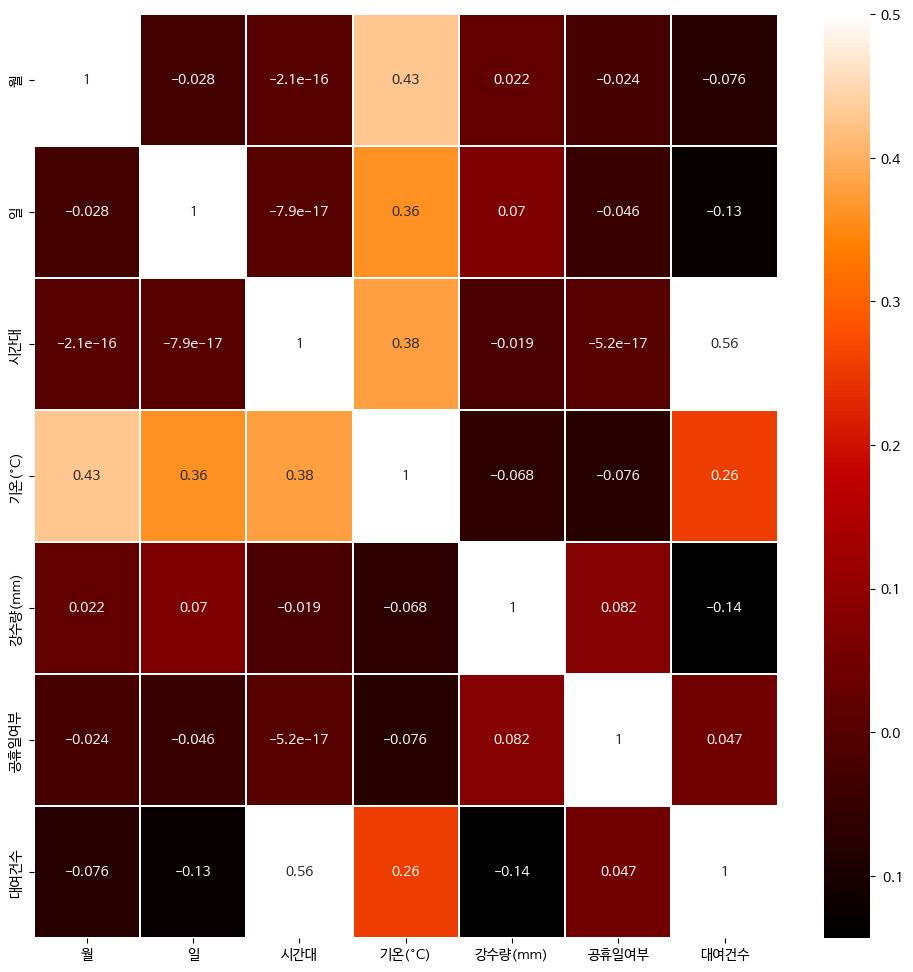

In [ ]:
plt.rc('font', family='NanumBarunGothic')

# 데이터 간의 상관 관계를 그래프로 표현해 봅니다.
colormap = plt.cm.gist_heat   # 그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))   # 그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울수록 밝은색으로 표시되게 합니다.
sns.heatmap(Final_df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

상관 관계가 높은 순서대로 재정렬 및 확인

In [ ]:
df_corr_sort= Final_df.corr().sort_values('대여건수', ascending=False)
df_corr_sort['대여건수'].head(6)

대여건수      1.000000
시간대       0.563950
기온(°C)    0.255093
공휴일여부     0.047023
월        -0.075695
일        -0.128512
Name: 대여건수, dtype: float64

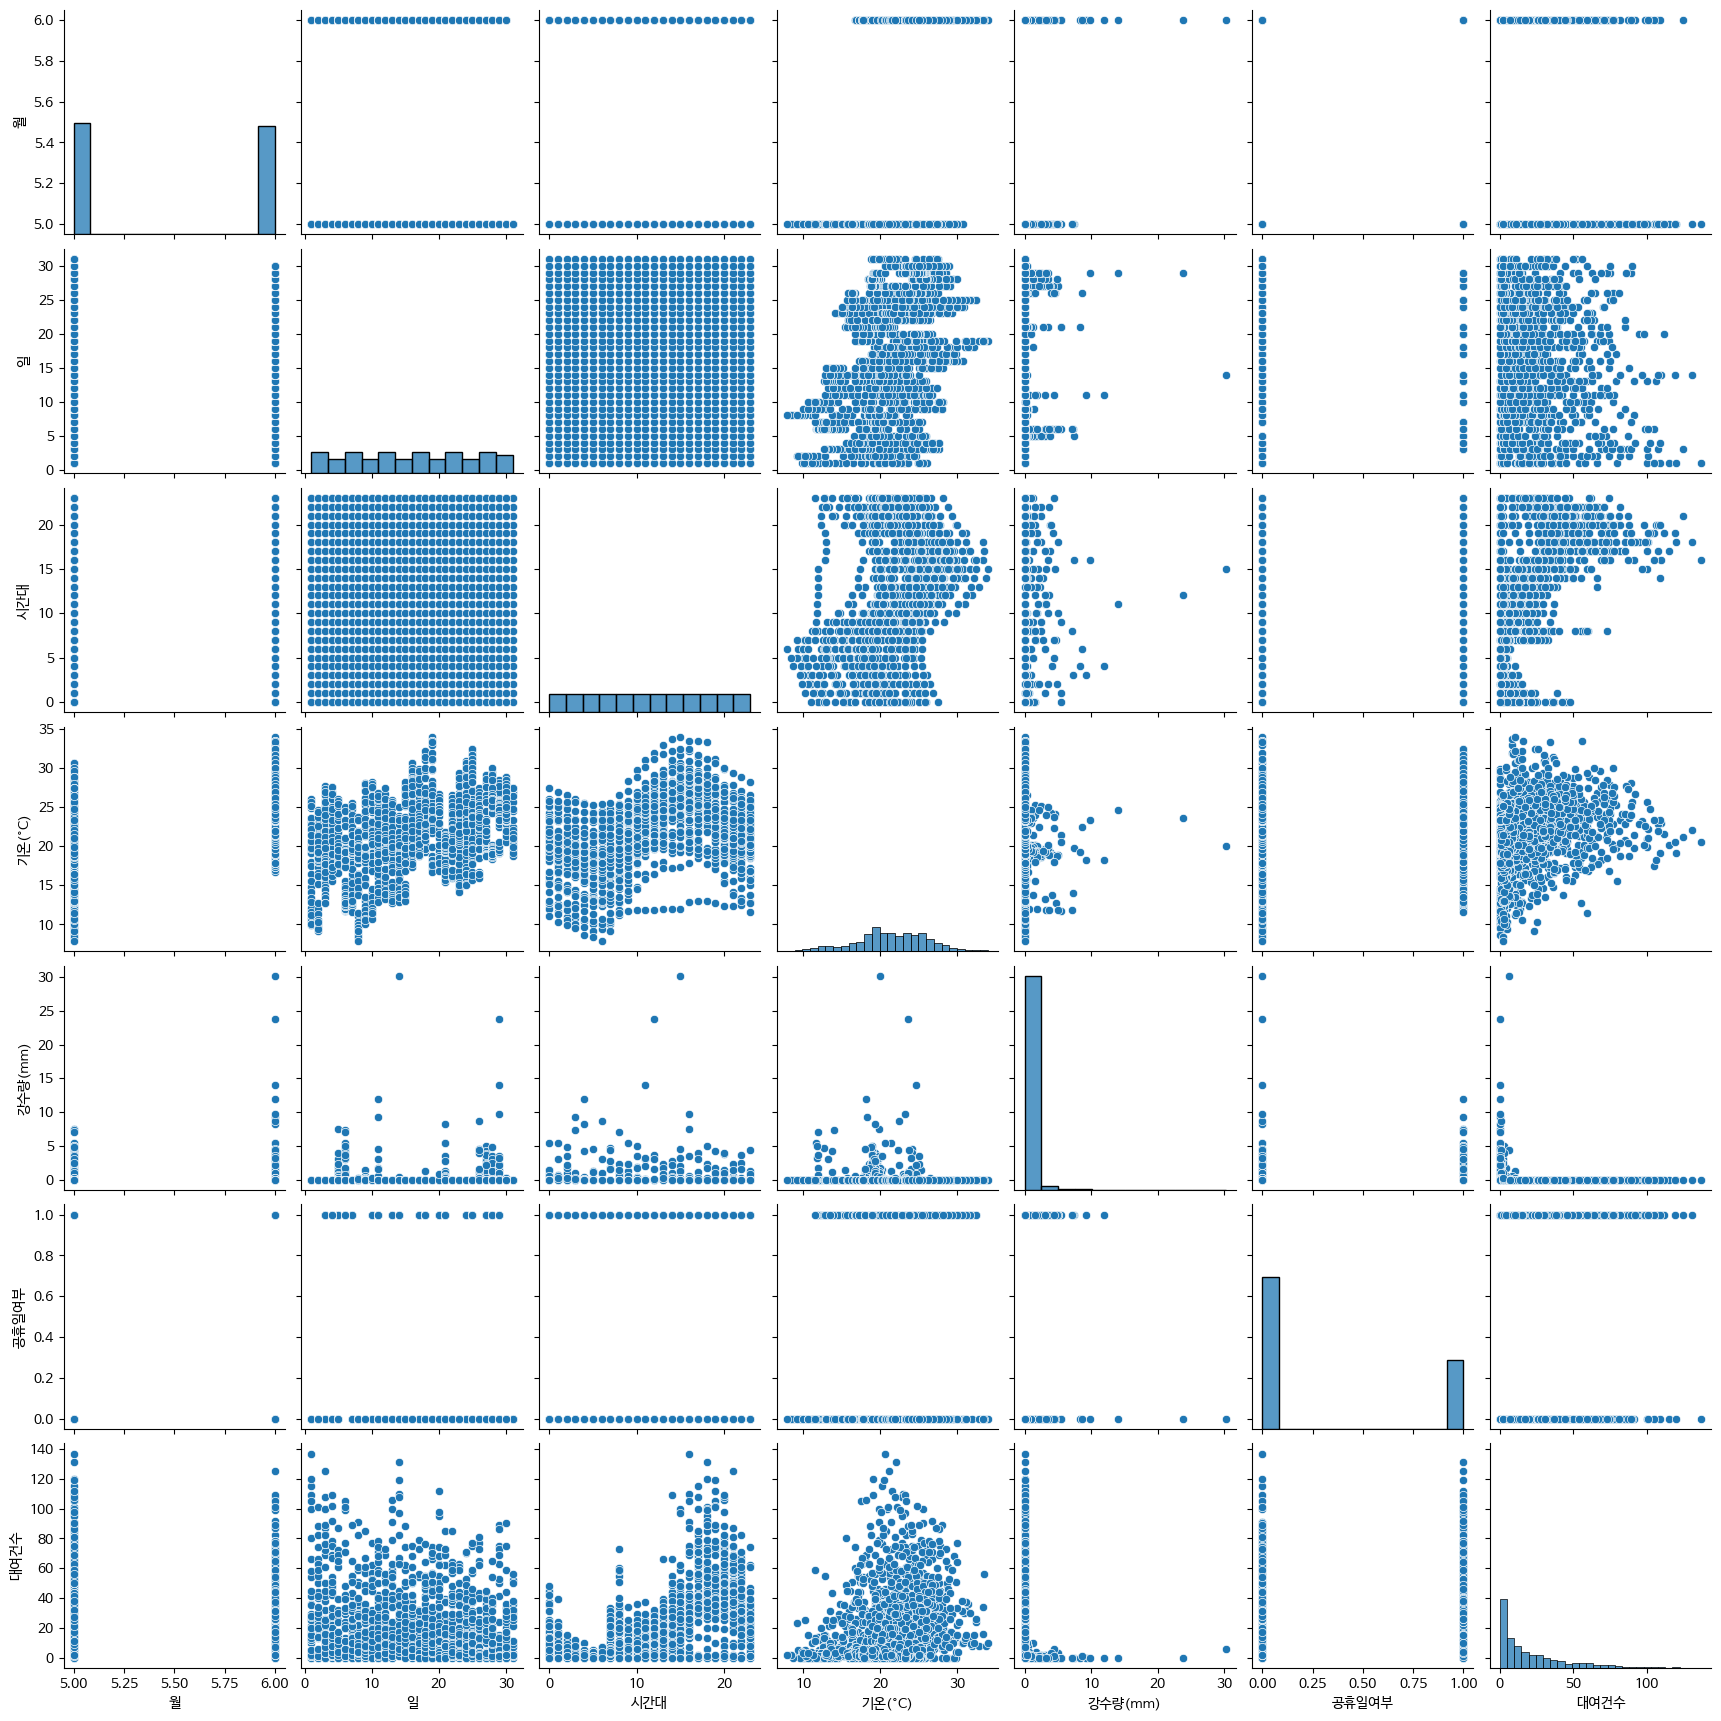

In [ ]:
cols=['월', '일', '시간대', '기온(°C)', '강수량(mm)','공휴일여부','대여건수']
sns.pairplot(Final_df[cols])
plt.show();

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
# pandas 라이브러리를 불러옵니다.
import pandas as pd
from sklearn.model_selection import train_test_split

학습 데이터 생성

In [27]:
data_X = Final_df.iloc[:,0:6]
data_y = Final_df.iloc[:,6]

In [ ]:
print("data_X shape : ",data_X.shape)
print("data_y shape : ",data_y.shape)

data_X shape :  (1464, 6)
data_y shape :  (1464,)


In [ ]:
X_norm = (data_X - np.min(data_X, axis=0)) / (np.max(data_X, axis=0) - np.min(data_X, axis=0))
y_norm = (data_y - np.min(data_y, axis=0)) / (np.max(data_y, axis=0) - np.min(data_y, axis=0))

#학습 및 검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, random_state=42)

#분리된 데이터 확인
print(" X_train.shape : " , X_train.shape)
print(" y_train.shape : ", y_train.shape)

print(" X_test.shape : ", X_test.shape )
print(" y_test.shape : ", y_test.shape)


 X_train.shape :  (1098, 6)
 y_train.shape :  (1098,)
 X_test.shape :  (366, 6)
 y_test.shape :  (366,)


LinearRegression을 이용한 회귀 분석 진행

In [ ]:

#선형 모델 테스트.
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train.values, y_train.values)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train.values, y_train.values)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test.values, y_test.values)))

lr.coef_: [-0.0655183  -0.11585348  0.26631138  0.25325639 -0.32147461  0.01926392]
lr.intercept_: -0.026612242385186224
훈련 세트 점수: 0.37
테스트 세트 점수: 0.41


임의 데이터를 통한 성능 확인

In [ ]:
# 월	 일	  시간대	       기온(°C)	  강수량(mm)	공휴일여부
# 5	    21	  0	          12.1	    0.0	        1
test = np.array([6, 23, 15, 32, 0, 1])

Test_s = (test - np.min(data_X, axis=0)) / (np.max(data_X, axis=0) - np.min(data_X, axis=0))

y_pred_norm = lr.predict(Test_s.values.reshape(1, -1))

new_y_pred = y_pred_norm*(np.max(data_y, axis=0) - np.min(data_y, axis=0)) + np.min(data_y, axis=0)
print(new_y_pred)

[34.20962225]


단순한 Linear Regression을 통해서는 좋은 성능이 나오지 않음을 확인함.


따라서 딥러닝 기법을 통한 방법으로 전환함.
시간에 따라 변하는 특성을 충분히 고려하기 위하여
lstm, GRU, RNN과 같은 다양한 Time serise 분석 모델을 활용할 예정임.

또한, 시간의 특성을 충분히 고려할 수 있도록 데이터를 Window size만큼 움직이면서 입력할 수 있도록 아래 함수를 사용하여 Input data를 재구성함.

In [28]:
# window_size = 1 = 1hour
def make_dataset(data, label, window_size=1):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

make_dataset 함수를 이용한 데이터 생성 확인
window_size는 하이퍼파라미터로써 작용하기 때문에 아래의 함수를 통해 생성된 데이터는 확인을 위한 용도로만 사용하고 각 모델마다 window_size를 다르게 주고 학습시켜보며 적절한 window_size를 구할 예정임.

즉, 아래의 데이터는 확인용으로만 사용함.

In [29]:
train_feature = Final_df.iloc[:,0:6]
train_label = Final_df.iloc[:,6]

train_feature, train_label = make_dataset(train_feature, train_label, 24)

In [ ]:
print(train_feature.shape)
print(train_feature)

(1440, 24, 6)
[[[ 5.   1.   0.  12.1  0.   0. ]
  [ 5.   1.   1.  11.6  0.   0. ]
  [ 5.   1.   2.  11.   0.   0. ]
  ...
  [ 5.   1.  21.  14.1  0.   0. ]
  [ 5.   1.  22.  13.4  0.   0. ]
  [ 5.   1.  23.  12.9  0.   0. ]]

 [[ 5.   1.   1.  11.6  0.   0. ]
  [ 5.   1.   2.  11.   0.   0. ]
  [ 5.   1.   3.  10.8  0.   0. ]
  ...
  [ 5.   1.  22.  13.4  0.   0. ]
  [ 5.   1.  23.  12.9  0.   0. ]
  [ 5.   2.   0.  12.   0.   0. ]]

 [[ 5.   1.   2.  11.   0.   0. ]
  [ 5.   1.   3.  10.8  0.   0. ]
  [ 5.   1.   4.  10.4  0.   0. ]
  ...
  [ 5.   1.  23.  12.9  0.   0. ]
  [ 5.   2.   0.  12.   0.   0. ]
  [ 5.   2.   1.  11.3  0.   0. ]]

 ...

 [[ 6.  29.  21.  23.4  0.1  0. ]
  [ 6.  29.  22.  23.4  0.   0. ]
  [ 6.  29.  23.  23.3  0.   0. ]
  ...
  [ 6.  30.  18.  28.   0.   0. ]
  [ 6.  30.  19.  27.6  0.   0. ]
  [ 6.  30.  20.  26.9  0.   0. ]]

 [[ 6.  29.  22.  23.4  0.   0. ]
  [ 6.  29.  23.  23.3  0.   0. ]
  [ 6.  30.   0.  23.2  0.   0. ]
  ...
  [ 6.  30.  19.  27.6  

In [ ]:
print(train_label.shape)
print(train_label)

(1440,)
[14.  3.  0. ... 44. 31. 17.]


단순한 모델을 통해 성능 평가 진행

관련 패키지 import

In [33]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import *
from tensorflow.keras.callbacks import *
import tensorflow as tf

다양한 window_size를 돌려보며 가장 성능이 좋은 window_size 결정

window_size = 12

 X_train.shape :  (1089, 12, 6)
 y_train.shape :  (1089,)
 X_test.shape :  (363, 12, 6)
 y_test.shape :  (363,)
Epoch 1/200
47/55 [========================>.....] - ETA: 0s - loss: 0.1277
Epoch 1: val_loss improved from inf to 0.05834, saving model to /content/drive/MyDrive/temproject/tmp_checkpoint.tf
55/55 [==============================] - 8s 104ms/step - loss: 0.1180 - val_loss: 0.0583
Epoch 2/200
48/55 [=========================>....] - ETA: 0s - loss: 0.0434
Epoch 2: val_loss improved from 0.05834 to 0.03666, saving model to /content/drive/MyDrive/temproject/tmp_checkpoint.tf
55/55 [==============================] - 5s 86ms/step - loss: 0.0420 - val_loss: 0.0367
Epoch 3/200
54/55 [============================>.] - ETA: 0s - loss: 0.0321
Epoch 3: val_loss improved from 0.03666 to 0.03201, saving model to /content/drive/MyDrive/temproject/tmp_checkpoint.tf
55/55 [==============================] - 5s 86ms/step - loss: 0.0325 - val_loss: 0.0320
Epoch 4/200
47/55 [====================

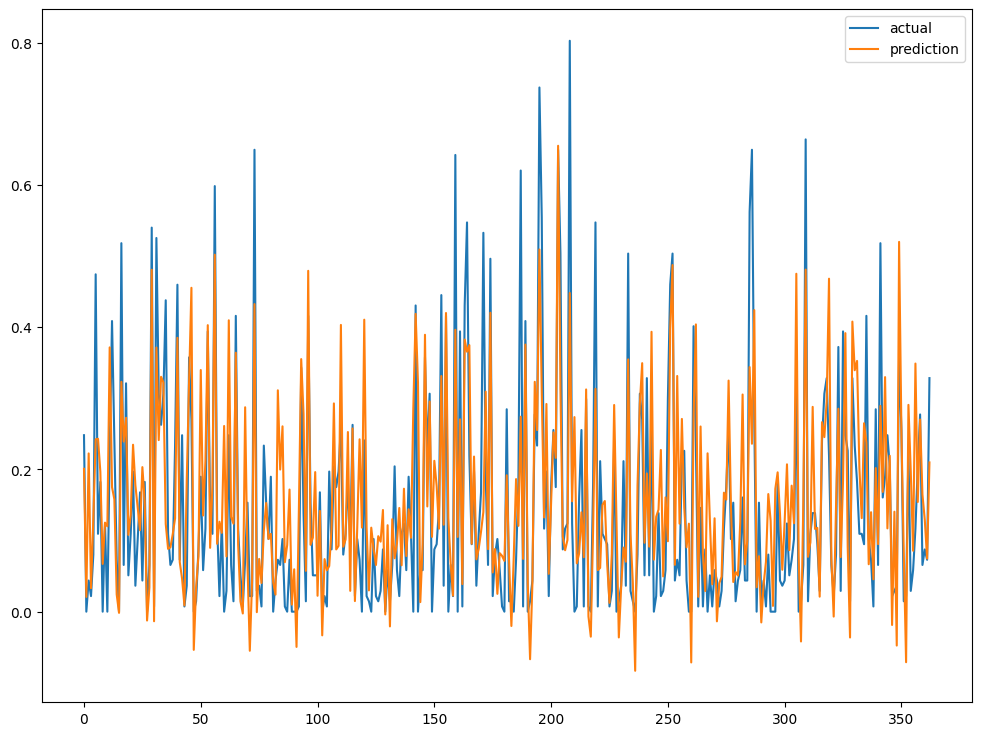

(363, 1)

In [ ]:
import os
class MySequentialModule(tf.keras.Model):
    def __init__(self, name=None):
        super(MySequentialModule, self).__init__(name=name)
        self.lstm = LSTM(4, input_shape=(None, 1,4), return_sequences=True)
        self.flatten = Flatten()
        self.dense2 = Dense(1)

    def call(self, inputs):
        x = self.lstm(inputs)  # 수정: 'x' 대신 'inputs'를 사용
        x = self.flatten(x)
        x = self.dense2(x)
        return x

train_feature = Final_df.iloc[:,0:6]
train_label = Final_df.iloc[:,6]

train_feature, train_label = make_dataset(train_feature, train_label, 12)

X_norm = (train_feature - np.min(train_feature, axis=0)) / (np.max(train_feature, axis=0) - np.min(train_feature, axis=0))
y_norm = (train_label - np.min(train_label, axis=0)) / (np.max(train_label, axis=0) - np.min(train_label, axis=0))

#학습 및 검증 데이터 분리
New_X_train, New_X_test, New_y_train, New_y_test = train_test_split(X_norm, y_norm, random_state=42)

#분리된 데이터 확인
print(" X_train.shape : " , New_X_train.shape)
print(" y_train.shape : ", New_y_train.shape)

print(" X_test.shape : ", New_X_test.shape)
print(" y_test.shape : ", New_y_test.shape)


New_model = MySequentialModule()



early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = '/content/drive/MyDrive/temproject'
filename = os.path.join(model_path, 'tmp_checkpoint.tf')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
New_model.compile(loss='mean_squared_error', optimizer='adam')
history = New_model.fit(New_X_train, New_y_train,
                                    epochs=200,
                                    batch_size=16,
                                    validation_split=0.20,
                                    callbacks=[early_stop, checkpoint])

# Evaluate the model
print("\n Test Mse_loss:" , New_model.evaluate(New_X_test, New_y_test))

New_model.load_weights(filename)
pred = New_model.predict(New_X_test)

plt.figure(figsize=(12, 9))
plt.plot(New_y_test, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()
pred.shape

window_size = 24

 X_train.shape :  (1080, 24, 6)
 y_train.shape :  (1080,)
 X_test.shape :  (360, 24, 6)
 y_test.shape :  (360,)
Epoch 1/200
53/54 [============================>.] - ETA: 0s - loss: 0.0757
Epoch 1: val_loss improved from inf to 0.03461, saving model to /content/drive/MyDrive/temproject/tmp_checkpoint.tf
54/54 [==============================] - 6s 75ms/step - loss: 0.0751 - val_loss: 0.0346
Epoch 2/200
54/54 [==============================] - ETA: 0s - loss: 0.0339
Epoch 2: val_loss improved from 0.03461 to 0.02728, saving model to /content/drive/MyDrive/temproject/tmp_checkpoint.tf
54/54 [==============================] - 6s 111ms/step - loss: 0.0339 - val_loss: 0.0273
Epoch 3/200
53/54 [============================>.] - ETA: 0s - loss: 0.0262
Epoch 3: val_loss improved from 0.02728 to 0.02250, saving model to /content/drive/MyDrive/temproject/tmp_checkpoint.tf
54/54 [==============================] - 4s 75ms/step - loss: 0.0267 - val_loss: 0.0225
Epoch 4/200
49/54 [====================

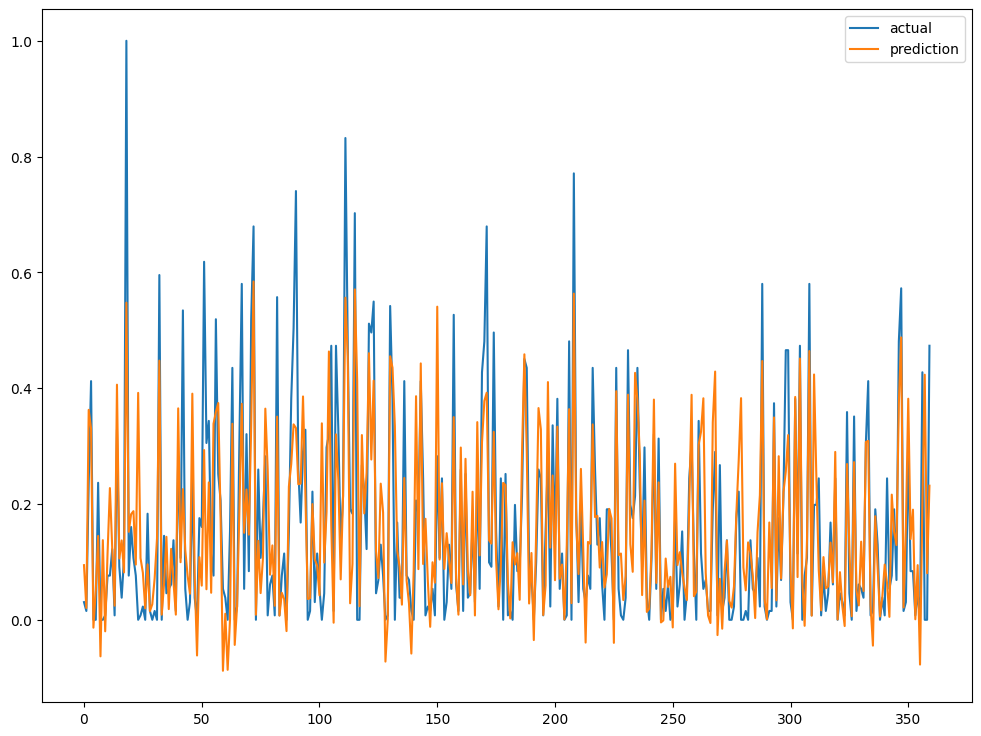

(360, 1)

In [ ]:
import os
class MySequentialModule(tf.keras.Model):
    def __init__(self, name=None):
        super(MySequentialModule, self).__init__(name=name)
        self.lstm = LSTM(4, input_shape=(None, 1,4), return_sequences=True)
        self.flatten = Flatten()
        self.dense2 = Dense(1)

    def call(self, inputs):
        x = self.lstm(inputs)  # 수정: 'x' 대신 'inputs'를 사용
        x = self.flatten(x)
        x = self.dense2(x)
        return x

train_feature = Final_df.iloc[:,0:6]
train_label = Final_df.iloc[:,6]

train_feature, train_label = make_dataset(train_feature, train_label, 24)

X_norm = (train_feature - np.min(train_feature, axis=0)) / (np.max(train_feature, axis=0) - np.min(train_feature, axis=0))
y_norm = (train_label - np.min(train_label, axis=0)) / (np.max(train_label, axis=0) - np.min(train_label, axis=0))

#학습 및 검증 데이터 분리
New_X_train, New_X_test, New_y_train, New_y_test = train_test_split(X_norm, y_norm, random_state=42)

#분리된 데이터 확인
print(" X_train.shape : " , New_X_train.shape)
print(" y_train.shape : ", New_y_train.shape)

print(" X_test.shape : ", New_X_test.shape)
print(" y_test.shape : ", New_y_test.shape)


New_model = MySequentialModule()



early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = '/content/drive/MyDrive/temproject'
filename = os.path.join(model_path, 'tmp_checkpoint.tf')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
New_model.compile(loss='mean_squared_error', optimizer='adam')
history = New_model.fit(New_X_train, New_y_train,
                                    epochs=200,
                                    batch_size=16,
                                    validation_split=0.20,
                                    callbacks=[early_stop, checkpoint])

# Evaluate the model
print("\n Test Mse_loss:" , New_model.evaluate(New_X_test, New_y_test))

New_model.load_weights(filename)
pred = New_model.predict(New_X_test)

plt.figure(figsize=(12, 9))
plt.plot(New_y_test, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()
pred.shape

window_size = 48

 X_train.shape :  (1053, 60, 6)
 y_train.shape :  (1053,)
 X_test.shape :  (351, 60, 6)
 y_test.shape :  (351,)
Epoch 1/200
51/53 [===========================>..] - ETA: 0s - loss: 0.0339
Epoch 1: val_loss improved from inf to 0.02467, saving model to /content/drive/MyDrive/temproject/tmp_checkpoint.tf
53/53 [==============================] - 7s 93ms/step - loss: 0.0336 - val_loss: 0.0247
Epoch 2/200
52/53 [============================>.] - ETA: 0s - loss: 0.0215
Epoch 2: val_loss improved from 0.02467 to 0.02112, saving model to /content/drive/MyDrive/temproject/tmp_checkpoint.tf
53/53 [==============================] - 5s 99ms/step - loss: 0.0216 - val_loss: 0.0211
Epoch 3/200
53/53 [==============================] - ETA: 0s - loss: 0.0195
Epoch 3: val_loss improved from 0.02112 to 0.01966, saving model to /content/drive/MyDrive/temproject/tmp_checkpoint.tf


53/53 [==============================] - 6s 124ms/step - loss: 0.0195 - val_loss: 0.0197
Epoch 4/200
53/53 [==============================] - ETA: 0s - loss: 0.0179
Epoch 4: val_loss improved from 0.01966 to 0.01694, saving model to /content/drive/MyDrive/temproject/tmp_checkpoint.tf
53/53 [==============================] - 4s 85ms/step - loss: 0.0179 - val_loss: 0.0169
Epoch 5/200
51/53 [===========================>..] - ETA: 0s - loss: 0.0177
Epoch 5: val_loss improved from 0.01694 to 0.01564, saving model to /content/drive/MyDrive/temproject/tmp_checkpoint.tf
53/53 [==============================] - 5s 98ms/step - loss: 0.0174 - val_loss: 0.0156
Epoch 6/200
53/53 [==============================] - ETA: 0s - loss: 0.0174
Epoch 6: val_loss did not improve from 0.01564
53/53 [==============================] - 2s 35ms/step - loss: 0.0174 - val_loss: 0.0160
Epoch 7/200
53/53 [==============================] - ETA: 0s - loss: 0.0181
Epoch 7: val_loss improved from 0.01564 to 0.01402, savi

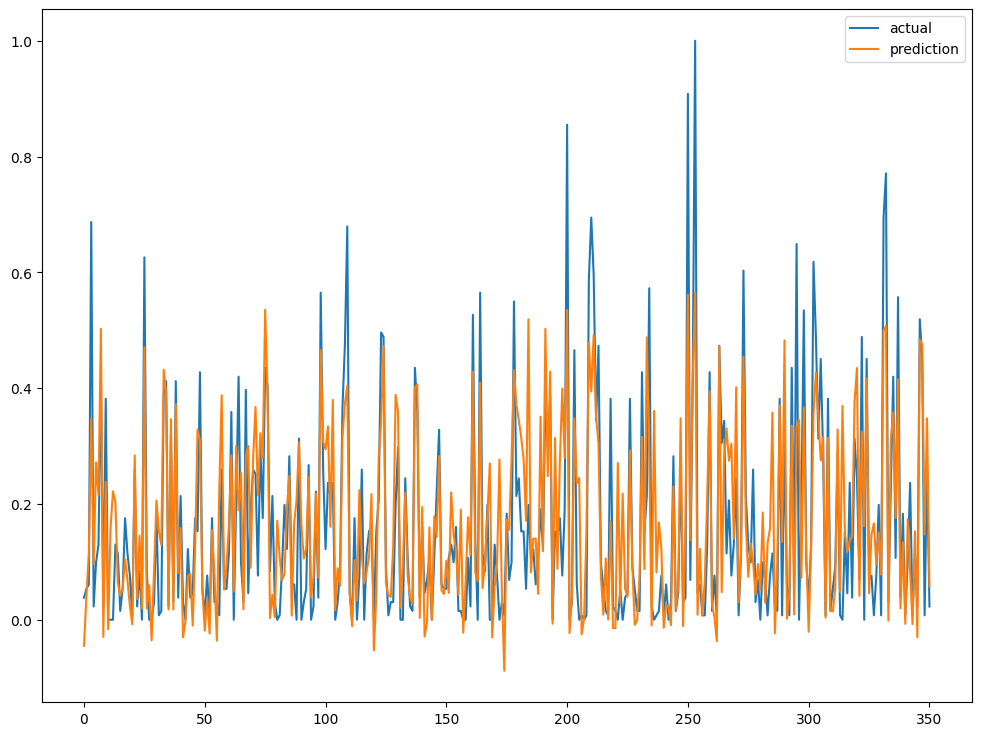

(351, 1)

In [ ]:
import os
class MySequentialModule(tf.keras.Model):
    def __init__(self, name=None):
        super(MySequentialModule, self).__init__(name=name)
        self.lstm = LSTM(4, input_shape=(None, 1,4), return_sequences=True)
        self.flatten = Flatten()
        self.dense2 = Dense(1)

    def call(self, inputs):
        x = self.lstm(inputs)  # 수정: 'x' 대신 'inputs'를 사용
        x = self.flatten(x)
        x = self.dense2(x)
        return x

train_feature = Final_df.iloc[:,0:6]
train_label = Final_df.iloc[:,6]

train_feature, train_label = make_dataset(train_feature, train_label, 60)

X_norm = (train_feature - np.min(train_feature, axis=0)) / (np.max(train_feature, axis=0) - np.min(train_feature, axis=0))
y_norm = (train_label - np.min(train_label, axis=0)) / (np.max(train_label, axis=0) - np.min(train_label, axis=0))

#학습 및 검증 데이터 분리
New_X_train, New_X_test, New_y_train, New_y_test = train_test_split(X_norm, y_norm, random_state=42)

#분리된 데이터 확인
print(" X_train.shape : " , New_X_train.shape)
print(" y_train.shape : ", New_y_train.shape)

print(" X_test.shape : ", New_X_test.shape)
print(" y_test.shape : ", New_y_test.shape)


New_model = MySequentialModule()



early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = '/content/drive/MyDrive/temproject'
filename = os.path.join(model_path, 'tmp_checkpoint.tf')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
New_model.compile(loss='mean_squared_error', optimizer='adam')
history = New_model.fit(New_X_train, New_y_train,
                                    epochs=200,
                                    batch_size=16,
                                    validation_split=0.20,
                                    callbacks=[early_stop, checkpoint])

# Evaluate the model
print("\n Test Mse_loss:" , New_model.evaluate(New_X_test, New_y_test))

New_model.load_weights(filename)
pred = New_model.predict(New_X_test)

plt.figure(figsize=(12, 9))
plt.plot(New_y_test, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()
pred.shape

window_size = 60

 X_train.shape :  (1053, 60, 6)
 y_train.shape :  (1053,)
 X_test.shape :  (351, 60, 6)
 y_test.shape :  (351,)
Epoch 1/200
53/53 [==============================] - ETA: 0s - loss: 0.0494
Epoch 1: val_loss improved from inf to 0.03661, saving model to /content/drive/MyDrive/temproject/tmp_checkpoint.tf
53/53 [==============================] - 9s 122ms/step - loss: 0.0494 - val_loss: 0.0366
Epoch 2/200
52/53 [============================>.] - ETA: 0s - loss: 0.0304
Epoch 2: val_loss improved from 0.03661 to 0.02666, saving model to /content/drive/MyDrive/temproject/tmp_checkpoint.tf
53/53 [==============================] - 4s 83ms/step - loss: 0.0302 - val_loss: 0.0267
Epoch 3/200
52/53 [============================>.] - ETA: 0s - loss: 0.0238
Epoch 3: val_loss improved from 0.02666 to 0.01972, saving model to /content/drive/MyDrive/temproject/tmp_checkpoint.tf
53/53 [==============================] - 4s 84ms/step - loss: 0.0236 - val_loss: 0.0197
Epoch 4/200
53/53 [====================

53/53 [==============================] - 7s 137ms/step - loss: 0.0202 - val_loss: 0.0164
Epoch 5/200
51/53 [===========================>..] - ETA: 0s - loss: 0.0187
Epoch 5: val_loss improved from 0.01640 to 0.01485, saving model to /content/drive/MyDrive/temproject/tmp_checkpoint.tf
53/53 [==============================] - 4s 85ms/step - loss: 0.0188 - val_loss: 0.0148
Epoch 6/200
53/53 [==============================] - ETA: 0s - loss: 0.0177
Epoch 6: val_loss improved from 0.01485 to 0.01442, saving model to /content/drive/MyDrive/temproject/tmp_checkpoint.tf
53/53 [==============================] - 4s 82ms/step - loss: 0.0177 - val_loss: 0.0144
Epoch 7/200
53/53 [==============================] - ETA: 0s - loss: 0.0169
Epoch 7: val_loss improved from 0.01442 to 0.01344, saving model to /content/drive/MyDrive/temproject/tmp_checkpoint.tf
53/53 [==============================] - 6s 115ms/step - loss: 0.0169 - val_loss: 0.0134
Epoch 8/200
52/53 [============================>.] - ETA: 

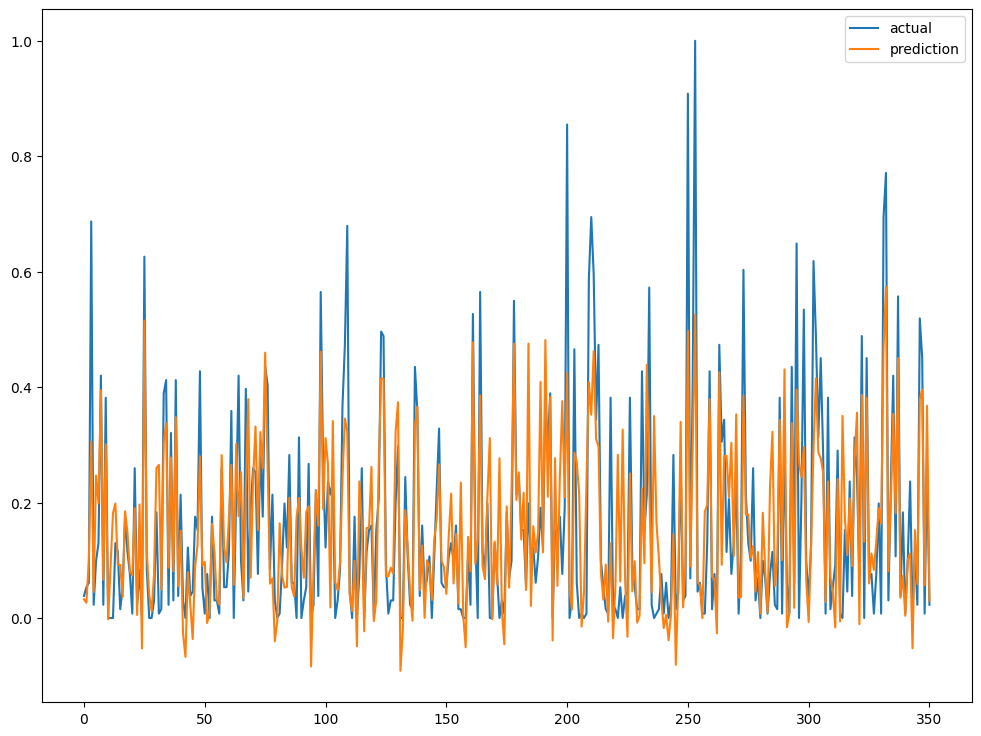

(351, 1)

In [ ]:
import os
class MySequentialModule(tf.keras.Model):
    def __init__(self, name=None):
        super(MySequentialModule, self).__init__(name=name)
        self.lstm = LSTM(4, input_shape=(None, 1,4), return_sequences=True)
        self.flatten = Flatten()
        self.dense2 = Dense(1)

    def call(self, inputs):
        x = self.lstm(inputs)  # 수정: 'x' 대신 'inputs'를 사용
        x = self.flatten(x)
        x = self.dense2(x)
        return x

train_feature = Final_df.iloc[:,0:6]
train_label = Final_df.iloc[:,6]

train_feature, train_label = make_dataset(train_feature, train_label, 60)

X_norm = (train_feature - np.min(train_feature, axis=0)) / (np.max(train_feature, axis=0) - np.min(train_feature, axis=0))
y_norm = (train_label - np.min(train_label, axis=0)) / (np.max(train_label, axis=0) - np.min(train_label, axis=0))

#학습 및 검증 데이터 분리
New_X_train, New_X_test, New_y_train, New_y_test = train_test_split(X_norm, y_norm, random_state=42)

#분리된 데이터 확인
print(" X_train.shape : " , New_X_train.shape)
print(" y_train.shape : ", New_y_train.shape)

print(" X_test.shape : ", New_X_test.shape)
print(" y_test.shape : ", New_y_test.shape)


New_model = MySequentialModule()



early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = '/content/drive/MyDrive/temproject'
filename = os.path.join(model_path, 'tmp_checkpoint.tf')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
New_model.compile(loss='mean_squared_error', optimizer='adam')
history = New_model.fit(New_X_train, New_y_train,
                                    epochs=200,
                                    batch_size=16,
                                    validation_split=0.20,
                                    callbacks=[early_stop, checkpoint])

# Evaluate the model
print("\n Test Mse_loss:" , New_model.evaluate(New_X_test, New_y_test))

New_model.load_weights(filename)
pred = New_model.predict(New_X_test)

plt.figure(figsize=(12, 9))
plt.plot(New_y_test, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()
pred.shape

window_size = 66

 X_train.shape :  (1048, 66, 6)
 y_train.shape :  (1048,)
 X_test.shape :  (350, 66, 6)
 y_test.shape :  (350,)
Epoch 1/200
53/53 [==============================] - ETA: 0s - loss: 0.0412
Epoch 1: val_loss improved from inf to 0.02554, saving model to /content/drive/MyDrive/temproject/tmp_checkpoint.tf


53/53 [==============================] - 10s 131ms/step - loss: 0.0412 - val_loss: 0.0255
Epoch 2/200
51/53 [===========================>..] - ETA: 0s - loss: 0.0218
Epoch 2: val_loss improved from 0.02554 to 0.02230, saving model to /content/drive/MyDrive/temproject/tmp_checkpoint.tf
53/53 [==============================] - 5s 88ms/step - loss: 0.0222 - val_loss: 0.0223
Epoch 3/200
51/53 [===========================>..] - ETA: 0s - loss: 0.0196
Epoch 3: val_loss improved from 0.02230 to 0.02066, saving model to /content/drive/MyDrive/temproject/tmp_checkpoint.tf
53/53 [==============================] - 6s 111ms/step - loss: 0.0194 - val_loss: 0.0207
Epoch 4/200
53/53 [==============================] - ETA: 0s - loss: 0.0187
Epoch 4: val_loss improved from 0.02066 to 0.01905, saving model to /content/drive/MyDrive/temproject/tmp_checkpoint.tf
53/53 [==============================] - 5s 105ms/step - loss: 0.0187 - val_loss: 0.0191
Epoch 5/200
52/53 [============================>.] - ETA

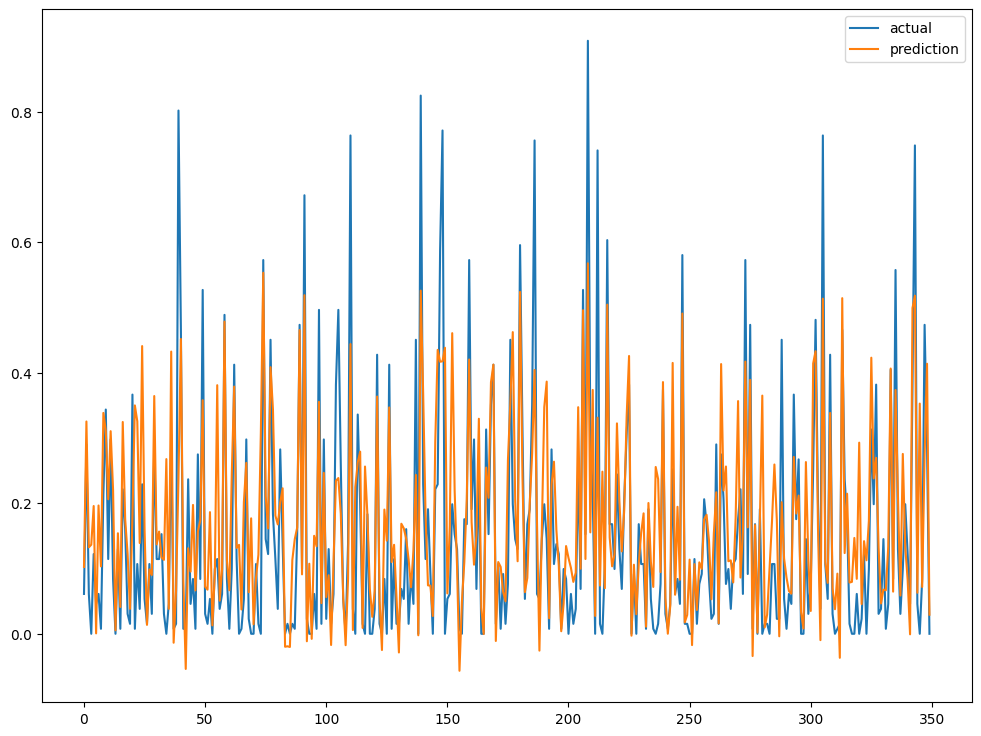

(350, 1)

In [ ]:
import os
class MySequentialModule(tf.keras.Model):
    def __init__(self, name=None):
        super(MySequentialModule, self).__init__(name=name)
        self.lstm = LSTM(4, input_shape=(None, 1,4), return_sequences=True)
        self.flatten = Flatten()
        self.dense2 = Dense(1)

    def call(self, inputs):
        x = self.lstm(inputs)  # 수정: 'x' 대신 'inputs'를 사용
        x = self.flatten(x)
        x = self.dense2(x)
        return x

train_feature = Final_df.iloc[:,0:6]
train_label = Final_df.iloc[:,6]

train_feature, train_label = make_dataset(train_feature, train_label, 66)

X_norm = (train_feature - np.min(train_feature, axis=0)) / (np.max(train_feature, axis=0) - np.min(train_feature, axis=0))
y_norm = (train_label - np.min(train_label, axis=0)) / (np.max(train_label, axis=0) - np.min(train_label, axis=0))

#학습 및 검증 데이터 분리
New_X_train, New_X_test, New_y_train, New_y_test = train_test_split(X_norm, y_norm, random_state=42)

#분리된 데이터 확인
print(" X_train.shape : " , New_X_train.shape)
print(" y_train.shape : ", New_y_train.shape)

print(" X_test.shape : ", New_X_test.shape)
print(" y_test.shape : ", New_y_test.shape)


New_model = MySequentialModule()



early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = '/content/drive/MyDrive/temproject'
filename = os.path.join(model_path, 'tmp_checkpoint.tf')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
New_model.compile(loss='mean_squared_error', optimizer='adam')
history = New_model.fit(New_X_train, New_y_train,
                                    epochs=200,
                                    batch_size=16,
                                    validation_split=0.20,
                                    callbacks=[early_stop, checkpoint])

# Evaluate the model
print("\n Test score:" , New_model.evaluate(New_X_test, New_y_test))

New_model.load_weights(filename)
pred = New_model.predict(New_X_test)

plt.figure(figsize=(12, 9))
plt.plot(New_y_test, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()
pred.shape

window_size = 12일떄 가장 좋은 성능을 보임.
따라서 window_size = 12로 임의 고정하여 이후 학습 진행.

In [36]:
import os
train_feature = Final_df.iloc[:,0:6]
train_label = Final_df.iloc[:,6]

train_feature, train_label = make_dataset(train_feature, train_label, 12)

X_norm = (train_feature - np.min(train_feature, axis=0)) / (np.max(train_feature, axis=0) - np.min(train_feature, axis=0))
y_norm = (train_label - np.min(train_label, axis=0)) / (np.max(train_label, axis=0) - np.min(train_label, axis=0))

#학습 및 검증 데이터 분리
New_X_train, New_X_test, New_y_train, New_y_test = train_test_split(X_norm, y_norm, random_state=42)

시계열적인 요소를 고려하여 학습을 진행하도록 하였을때 기존의 방법보다 훨씬 좋은 성능을 보임.

따라서 본 데이터에는 이러한 학습 방법론이 더 적합함을 알 수 있음.

이에 따라 이러한 방법론을 더욱 구체화시켜 성능 향상을 시킬 예정임.
우선적으로 바닐라 LSTM , RNN , 1D-CNN, GRU 등 모델 성능 확인

LSTM

 X_train.shape :  (1089, 12, 6)
 y_train.shape :  (1089,)
 X_test.shape :  (363, 12, 6)
 y_test.shape :  (363,)
Epoch 1/200
54/55 [============================>.] - ETA: 0s - loss: 0.0351
Epoch 1: val_loss improved from inf to 0.03098, saving model to /content/drive/MyDrive/temproject/best_LSTMModel.tf
55/55 [==============================] - 15s 187ms/step - loss: 0.0348 - val_loss: 0.0310
Epoch 2/200
55/55 [==============================] - ETA: 0s - loss: 0.0255
Epoch 2: val_loss improved from 0.03098 to 0.02458, saving model to /content/drive/MyDrive/temproject/best_LSTMModel.tf


55/55 [==============================] - 9s 157ms/step - loss: 0.0255 - val_loss: 0.0246
Epoch 3/200
54/55 [============================>.] - ETA: 0s - loss: 0.0218
Epoch 3: val_loss improved from 0.02458 to 0.02105, saving model to /content/drive/MyDrive/temproject/best_LSTMModel.tf
55/55 [==============================] - 9s 166ms/step - loss: 0.0217 - val_loss: 0.0210
Epoch 4/200
54/55 [============================>.] - ETA: 0s - loss: 0.0183
Epoch 4: val_loss improved from 0.02105 to 0.01956, saving model to /content/drive/MyDrive/temproject/best_LSTMModel.tf
55/55 [==============================] - 8s 139ms/step - loss: 0.0185 - val_loss: 0.0196
Epoch 5/200
55/55 [==============================] - ETA: 0s - loss: 0.0171
Epoch 5: val_loss improved from 0.01956 to 0.01644, saving model to /content/drive/MyDrive/temproject/best_LSTMModel.tf
55/55 [==============================] - 11s 195ms/step - loss: 0.0171 - val_loss: 0.0164
Epoch 6/200
55/55 [==============================] - ET

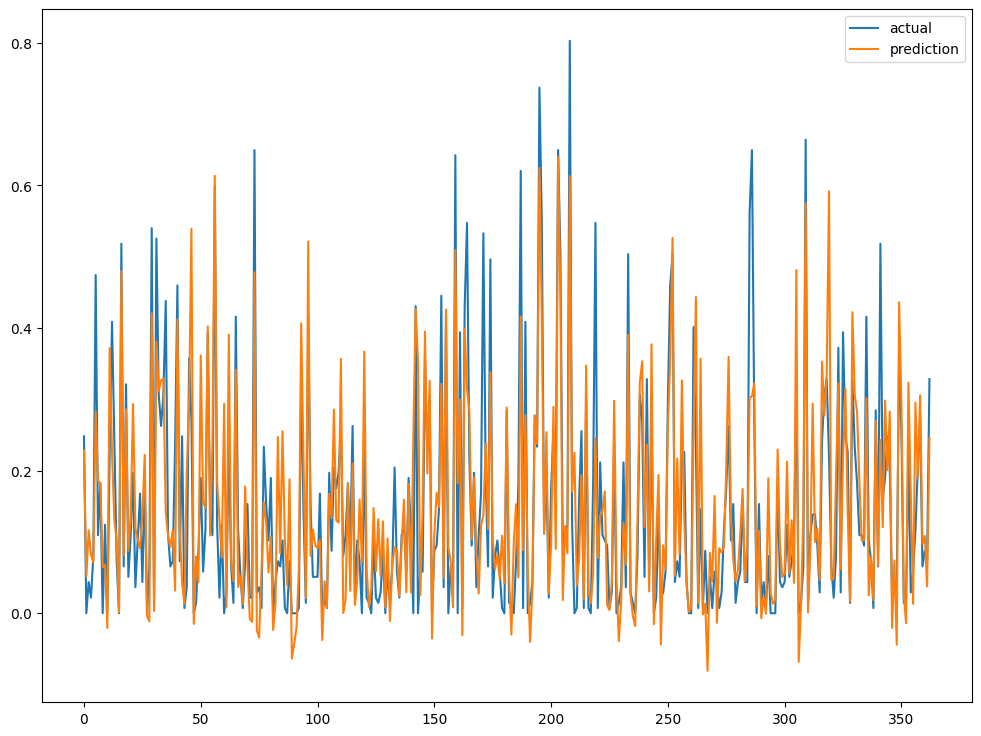

In [ ]:
class LSTMModule(tf.keras.Model):
    def __init__(self, name=None):
        super(LSTMModule, self).__init__(name=name)
        self.lstm_layer1 = Sequential([
            LSTM(6, return_sequences=True),
            LSTM(32, return_sequences=True)
        ])

        self.Fc = Sequential([
            Flatten(),
            Dense(32, activation='relu'),
            Dense(1)
        ])



    def call(self, inputs):
        x = self.lstm_layer1(inputs)

        x = self.Fc(x)

        return x


#분리된 데이터 확인
print(" X_train.shape : " , New_X_train.shape)
print(" y_train.shape : ", New_y_train.shape)

print(" X_test.shape : ", New_X_test.shape)
print(" y_test.shape : ", New_y_test.shape)

LSTMModel = LSTMModule()

# 콜백 및 모델 컴파일
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model_path_LSTMModel = '/content/drive/MyDrive/temproject'
filename = os.path.join(model_path_LSTMModel, 'best_LSTMModel.tf')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
LSTMModel.compile(loss='mean_squared_error', optimizer='adam')

# 학습
history = LSTMModel.fit(New_X_train, New_y_train,
                                                    epochs=200,
                                                    batch_size=16,
                                                    validation_split=0.20,
                                                    callbacks=[early_stop, checkpoint])

# 모델 평가
print("\n Test Mse_loss:", LSTMModel.evaluate(New_X_test, New_y_test))

# 가중치 로드
LSTMModel.load_weights(filename)

# 예측 및 시각화
pred = LSTMModel.predict(New_X_test)

plt.figure(figsize=(12, 9))
plt.plot(New_y_test, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

GRU

 X_train.shape :  (1089, 12, 6)
 y_train.shape :  (1089,)
 X_test.shape :  (363, 12, 6)
 y_test.shape :  (363,)
Epoch 1/200
54/55 [============================>.] - ETA: 0s - loss: 0.0309
Epoch 1: val_loss improved from inf to 0.02582, saving model to /content/drive/MyDrive/temproject/best_GRUModel.tf
55/55 [==============================] - 15s 175ms/step - loss: 0.0307 - val_loss: 0.0258
Epoch 2/200
53/55 [===========================>..] - ETA: 0s - loss: 0.0203
Epoch 2: val_loss improved from 0.02582 to 0.01881, saving model to /content/drive/MyDrive/temproject/best_GRUModel.tf
55/55 [==============================] - 8s 145ms/step - loss: 0.0202 - val_loss: 0.0188
Epoch 3/200
53/55 [===========================>..] - ETA: 0s - loss: 0.0171
Epoch 3: val_loss improved from 0.01881 to 0.01679, saving model to /content/drive/MyDrive/temproject/best_GRUModel.tf
55/55 [==============================] - 7s 127ms/step - loss: 0.0169 - val_loss: 0.0168
Epoch 4/200
55/55 [====================

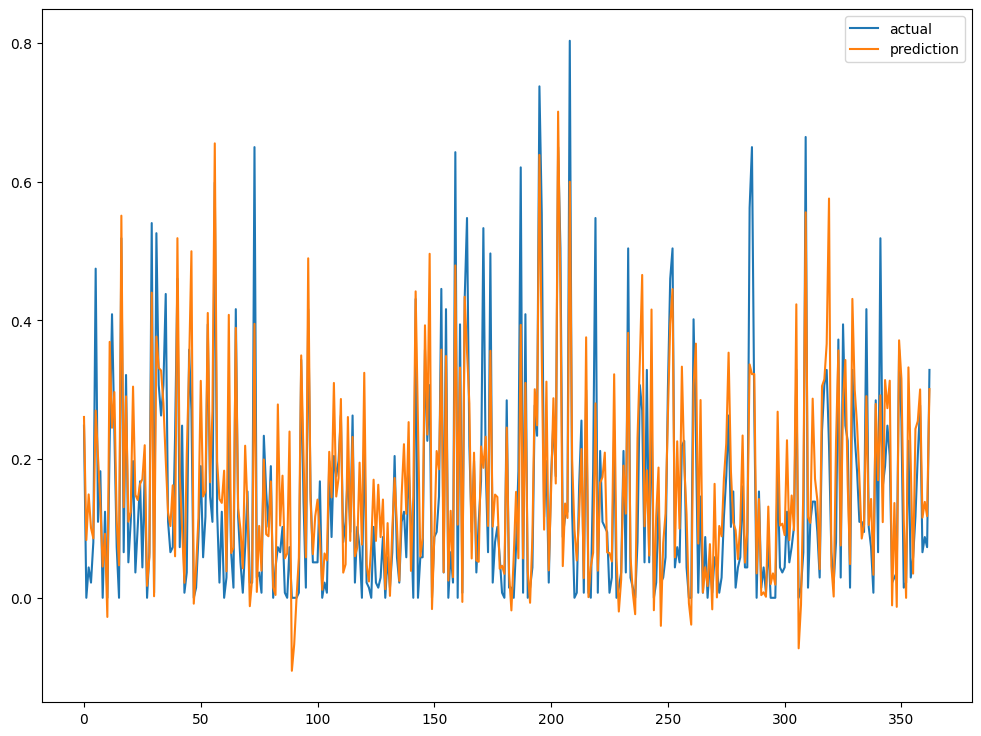

In [ ]:
class GRUModule(tf.keras.Model):
    def __init__(self, name=None):
        super(GRUModule, self).__init__(name=name)
        self.GRU_layer1 = Sequential([
            GRU(6, return_sequences=True),
            GRU(32, return_sequences=True)
        ])

        self.Fc = Sequential([
            Flatten(),
            Dense(32, activation='relu'),
            Dense(1)
        ])
    def call(self, inputs):
        x = self.GRU_layer1(inputs)

        x = self.Fc(x)

        return x



#분리된 데이터 확인
print(" X_train.shape : " , New_X_train.shape)
print(" y_train.shape : ", New_y_train.shape)

print(" X_test.shape : ", New_X_test.shape)
print(" y_test.shape : ", New_y_test.shape)

GRUModel = GRUModule()

# 콜백 및 모델 컴파일
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model_path = '/content/drive/MyDrive/temproject'
filename = os.path.join(model_path, 'best_GRUModel.tf')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
GRUModel.compile(loss='mean_squared_error', optimizer='adam')

# 학습
history = GRUModel.fit(New_X_train, New_y_train,
                                    epochs=200,
                                    batch_size=16,
                                    validation_split=0.20,
                                    callbacks=[early_stop, checkpoint])

# 모델 평가
print("\n Test Mse_loss:", GRUModel.evaluate(New_X_test, New_y_test))

# 가중치 로드
GRUModel.load_weights(filename)

# 예측 및 시각화
pred = GRUModel.predict(New_X_test)

plt.figure(figsize=(12, 9))
plt.plot(New_y_test, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

1D-CNN

 X_train.shape :  (1089, 12, 6)
 y_train.shape :  (1089,)
 X_test.shape :  (363, 12, 6)
 y_test.shape :  (363,)
Epoch 1/200
50/55 [==========================>...] - ETA: 0s - loss: 0.0341
Epoch 1: val_loss improved from inf to 0.02952, saving model to /content/drive/MyDrive/temproject/best_CNNModel.tf
55/55 [==============================] - 4s 47ms/step - loss: 0.0334 - val_loss: 0.0295
Epoch 2/200
40/55 [====================>.........] - ETA: 0s - loss: 0.0259
Epoch 2: val_loss improved from 0.02952 to 0.02931, saving model to /content/drive/MyDrive/temproject/best_CNNModel.tf
55/55 [==============================] - 1s 20ms/step - loss: 0.0246 - val_loss: 0.0293
Epoch 3/200
47/55 [========================>.....] - ETA: 0s - loss: 0.0232
Epoch 3: val_loss improved from 0.02931 to 0.02254, saving model to /content/drive/MyDrive/temproject/best_CNNModel.tf
55/55 [==============================] - 1s 19ms/step - loss: 0.0221 - val_loss: 0.0225
Epoch 4/200
48/55 [========================

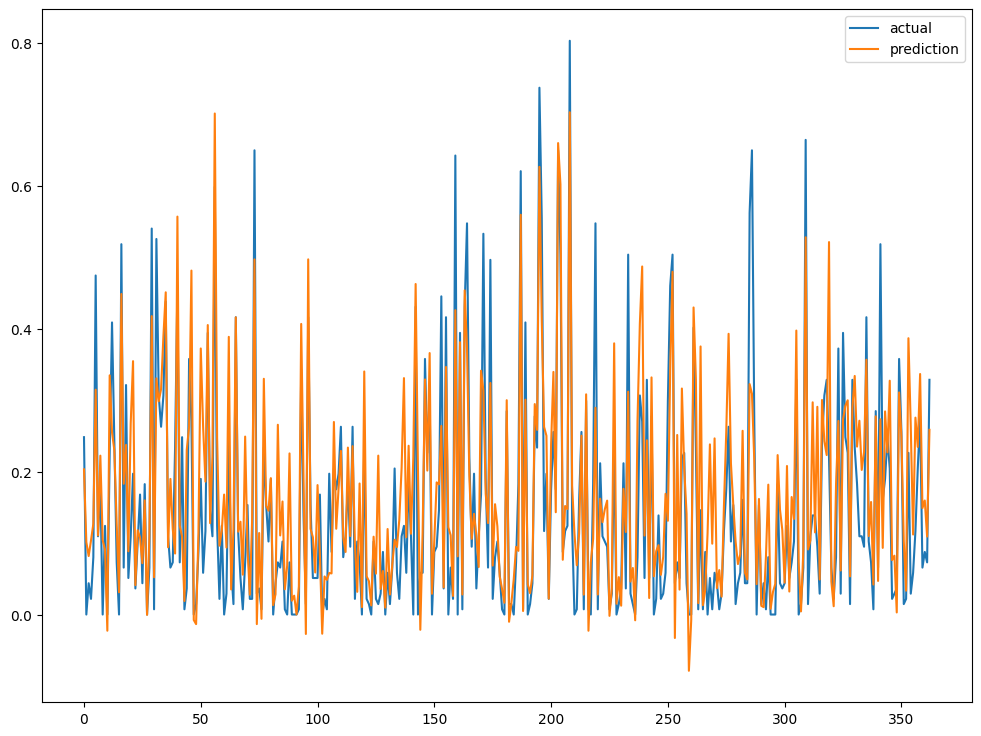

In [ ]:
class CNNModule(tf.keras.Model):
    def __init__(self, name=None):
        super(CNNModule, self).__init__(name=name)
        self.CNN_layer1 = Sequential([
            Conv1D(6, (3), activation='relu'),
            Conv1D(32, (3), activation='relu')
        ])

        self.Fc = Sequential([
            Flatten(),
            Dense(32, activation='relu'),
            Dense(1)
        ])
    def call(self, inputs):
        x = self.CNN_layer1(inputs)

        x = self.Fc(x)

        return x

#분리된 데이터 확인
print(" X_train.shape : " , New_X_train.shape)
print(" y_train.shape : ", New_y_train.shape)

print(" X_test.shape : ", New_X_test.shape)
print(" y_test.shape : ", New_y_test.shape)

CNNModel = CNNModule()

# 콜백 및 모델 컴파일
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model_path = '/content/drive/MyDrive/temproject'
filename = os.path.join(model_path, 'best_CNNModel.tf')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
CNNModel.compile(loss='mean_squared_error', optimizer='adam')

# 학습
history = CNNModel.fit(New_X_train, New_y_train,
                                    epochs=200,
                                    batch_size=16,
                                    validation_split=0.20,
                                    callbacks=[early_stop, checkpoint])

# 모델 평가
print("\n Test Mse_loss:", CNNModel.evaluate(New_X_test, New_y_test))

# 가중치 로드
CNNModel.load_weights(filename)

# 예측 및 시각화
pred = CNNModel.predict(New_X_test)

plt.figure(figsize=(12, 9))
plt.plot(New_y_test, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

RNN

 X_train.shape :  (1089, 12, 6)
 y_train.shape :  (1089,)
 X_test.shape :  (363, 12, 6)
 y_test.shape :  (363,)
Epoch 1/200
55/55 [==============================] - ETA: 0s - loss: 0.0430
Epoch 1: val_loss improved from inf to 0.01873, saving model to /content/drive/MyDrive/temproject/best_RNNModel.tf
55/55 [==============================] - 8s 102ms/step - loss: 0.0430 - val_loss: 0.0187
Epoch 2/200
48/55 [=========================>....] - ETA: 0s - loss: 0.0161
Epoch 2: val_loss did not improve from 0.01873
55/55 [==============================] - 0s 8ms/step - loss: 0.0163 - val_loss: 0.0210
Epoch 3/200
55/55 [==============================] - ETA: 0s - loss: 0.0145
Epoch 3: val_loss did not improve from 0.01873
55/55 [==============================] - 0s 8ms/step - loss: 0.0145 - val_loss: 0.0188
Epoch 4/200
54/55 [============================>.] - ETA: 0s - loss: 0.0141
Epoch 4: val_loss did not improve from 0.01873
55/55 [==============================] - 0s 7ms/step - loss: 0.01

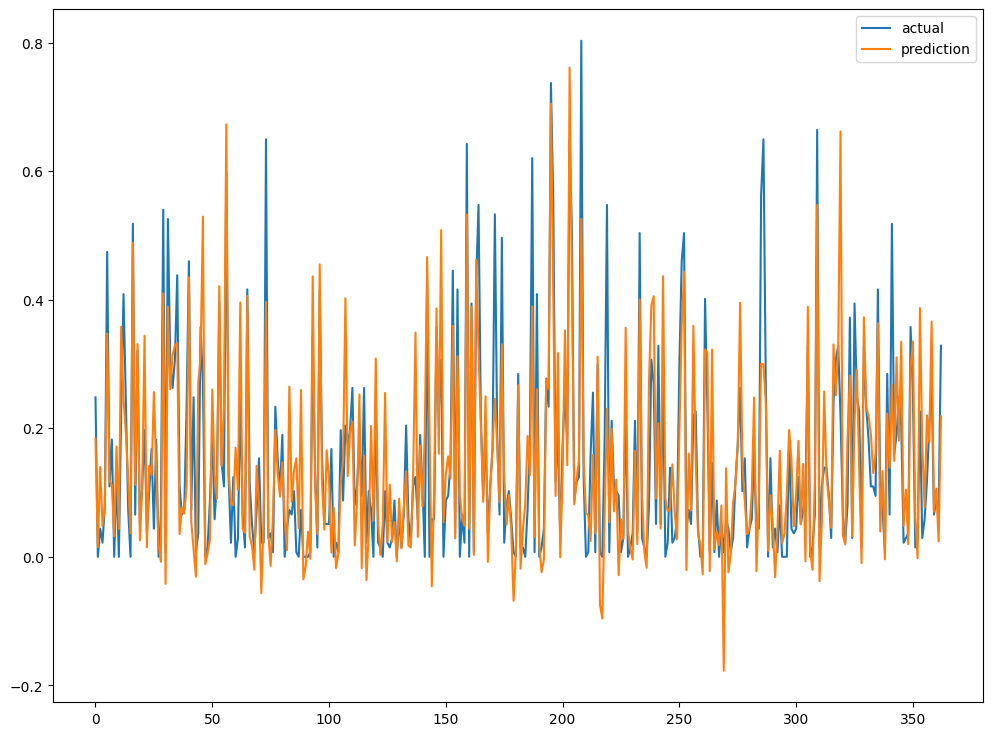

In [ ]:
class RNNModule(tf.keras.Model):
    def __init__(self, name=None):
        super(RNNModule, self).__init__(name=name)
        self.RNN_layer1 = Sequential([
            SimpleRNN(6, return_sequences=True),
            SimpleRNN(32, return_sequences=True)
        ])

        self.Fc = Sequential([
            Flatten(),
            Dense(32, activation='relu'),
            Dense(1)
        ])
    def call(self, inputs):
        x = self.RNN_layer1(inputs)

        x = self.Fc(x)

        return x

#분리된 데이터 확인
print(" X_train.shape : " , New_X_train.shape)
print(" y_train.shape : ", New_y_train.shape)

print(" X_test.shape : ", New_X_test.shape)
print(" y_test.shape : ", New_y_test.shape)

RNNModel = RNNModule()

# 콜백 및 모델 컴파일
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model_path = '/content/drive/MyDrive/temproject'
filename = os.path.join(model_path, 'best_RNNModel.tf')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
RNNModel.compile(loss='mean_squared_error', optimizer='adam')

# 학습
history = RNNModel.fit(New_X_train, New_y_train,
                                    epochs=200,
                                    batch_size=16,
                                    validation_split=0.20,
                                    callbacks=[early_stop, checkpoint])

# 모델 평가
print("\n Test Mse_loss:", RNNModel.evaluate(New_X_test, New_y_test))

# 가중치 로드
RNNModel.load_weights(filename)

# 예측 및 시각화
pred = RNNModel.predict(New_X_test)

plt.figure(figsize=(12, 9))
plt.plot(New_y_test, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [ ]:
print("\n RNN Test score:" , RNNModel.evaluate(New_X_test, New_y_test))
print("\n LSTM Test score:" , LSTMModel.evaluate(New_X_test, New_y_test))
print("\n 1D-CNN Test score:" , CNNModel.evaluate(New_X_test, New_y_test))
print("\n GRU Test score:" , GRUModel.evaluate(New_X_test, New_y_test))


12/12 [==============================] - 0s 3ms/step - loss: 0.0083

 RNN Test score: 0.008290864527225494
12/12 [==============================] - 0s 4ms/step - loss: 0.0084

 LSTM Test score: 0.00841631181538105
12/12 [==============================] - 0s 2ms/step - loss: 0.0082

 1D-CNN Test score: 0.008171900175511837
12/12 [==============================] - 0s 4ms/step - loss: 0.0075

 GRU Test score: 0.0075337570160627365


가장 성능이 좋게나오는 GRU, 1D-CNN를 바탕으로 모델을 구체화할 예정입니다.
또한 GRU의 경우 양방향 모델에 대한 성능도 확인해보도록하겠습니다.


 X_train.shape :  (1089, 12, 6)
 y_train.shape :  (1089,)
 X_test.shape :  (363, 12, 6)
 y_test.shape :  (363,)
Epoch 1/200
55/55 [==============================] - ETA: 0s - loss: 0.0261
Epoch 1: val_loss improved from inf to 0.02300, saving model to /content/drive/MyDrive/temproject/best_bidirectional_GRUModel.tf
55/55 [==============================] - 34s 482ms/step - loss: 0.0261 - val_loss: 0.0230
Epoch 2/200
55/55 [==============================] - ETA: 0s - loss: 0.0172
Epoch 2: val_loss improved from 0.02300 to 0.01703, saving model to /content/drive/MyDrive/temproject/best_bidirectional_GRUModel.tf
55/55 [==============================] - 22s 415ms/step - loss: 0.0172 - val_loss: 0.0170
Epoch 3/200
54/55 [============================>.] - ETA: 0s - loss: 0.0150
Epoch 3: val_loss improved from 0.01703 to 0.01550, saving model to /content/drive/MyDrive/temproject/best_bidirectional_GRUModel.tf
55/55 [==============================] - 23s 433ms/step - loss: 0.0150 - val_loss: 0.

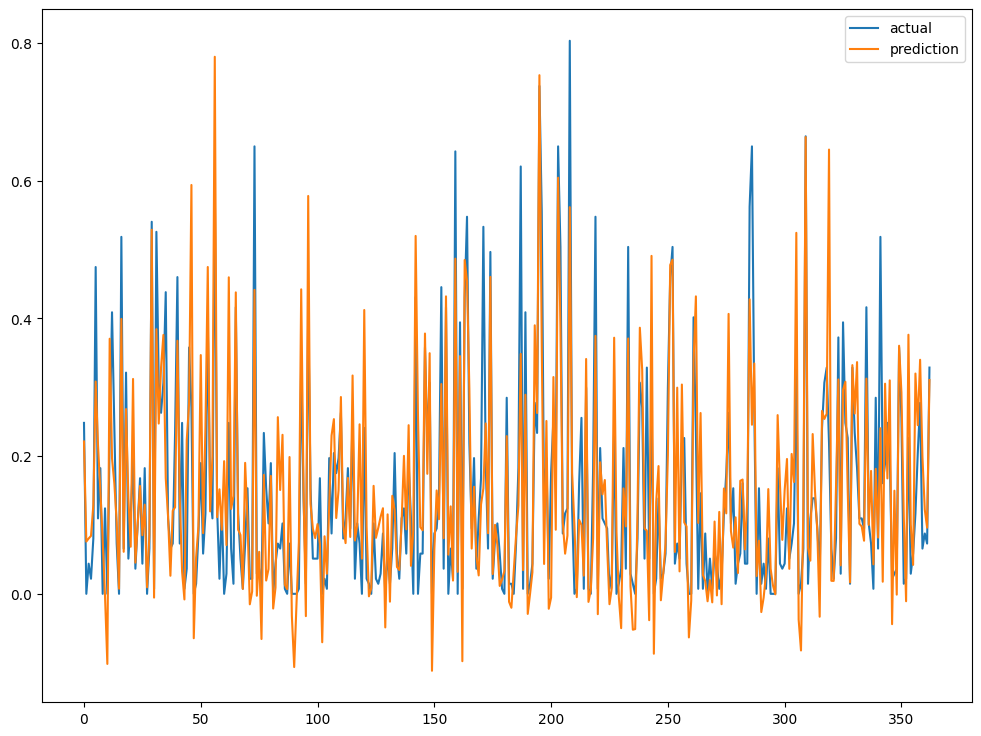

In [ ]:
class BidirectionalGRUModule(tf.keras.Model):
    def __init__(self, name=None):
        super(BidirectionalGRUModule, self).__init__(name=name)
        self.Bidirectional_GRU_layer1 = Bidirectional(GRU(6, return_sequences=True))
        self.Bidirectional_GRU_layer2 = Bidirectional(GRU(32, return_sequences=True))

        self.Fc = Sequential([
            Flatten(),
            Dense(32, activation='relu'),
            Dense(1)
        ])

    def call(self, inputs):
        x = self.Bidirectional_GRU_layer1(inputs)
        x = self.Bidirectional_GRU_layer2(x)
        x = self.Fc(x)
        return x

#분리된 데이터 확인
print(" X_train.shape : " , New_X_train.shape)
print(" y_train.shape : ", New_y_train.shape)

print(" X_test.shape : ", New_X_test.shape)
print(" y_test.shape : ", New_y_test.shape)

bidirectional_GRUModel = BidirectionalGRUModule()

# 콜백 및 모델 컴파일
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model_path = '/content/drive/MyDrive/temproject'
filename = os.path.join(model_path, 'best_bidirectional_GRUModel.tf')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
bidirectional_GRUModel.compile(loss='mean_squared_error', optimizer='adam')

# 학습
history = bidirectional_GRUModel.fit(New_X_train, New_y_train,
                                      epochs=200,
                                      batch_size=16,
                                      validation_split=0.20,
                                      callbacks=[early_stop, checkpoint])

# 모델 평가
print("\n Test Mse_loss:", bidirectional_GRUModel.evaluate(New_X_test, New_y_test))

# 가중치 로드
bidirectional_GRUModel.load_weights(filename)

# 예측 및 시각화
pred = bidirectional_GRUModel.predict(New_X_test)

plt.figure(figsize=(12, 9))
plt.plot(New_y_test, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()


양방향 GRU의 경우 그렇게 좋지 못한 성능을 보인다.
따라서 단방향 GRU를 더 깊게 쌓아보도록하겠다.

 X_train.shape :  (1089, 12, 6)
 y_train.shape :  (1089,)
 X_test.shape :  (363, 12, 6)
 y_test.shape :  (363,)
Epoch 1/200
54/55 [============================>.] - ETA: 0s - loss: 0.0307
Epoch 1: val_loss improved from inf to 0.03084, saving model to /content/drive/MyDrive/temproject/best_GRUModel2.tf
55/55 [==============================] - 28s 320ms/step - loss: 0.0307 - val_loss: 0.0308
Epoch 2/200
55/55 [==============================] - ETA: 0s - loss: 0.0185
Epoch 2: val_loss improved from 0.03084 to 0.01630, saving model to /content/drive/MyDrive/temproject/best_GRUModel2.tf
55/55 [==============================] - 14s 264ms/step - loss: 0.0185 - val_loss: 0.0163
Epoch 3/200
53/55 [===========================>..] - ETA: 0s - loss: 0.0140
Epoch 3: val_loss did not improve from 0.01630
55/55 [==============================] - 2s 38ms/step - loss: 0.0143 - val_loss: 0.0167
Epoch 4/200
55/55 [==============================] - ETA: 0s - loss: 0.0140
Epoch 4: val_loss improved from 0

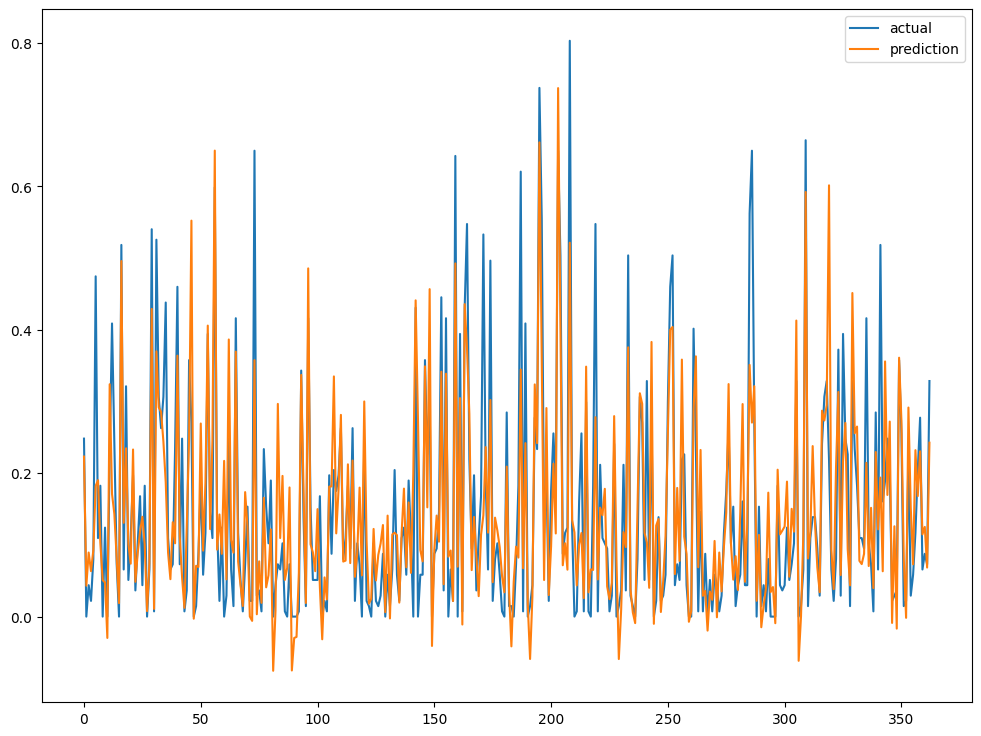

In [ ]:
class GRUModule2(tf.keras.Model):
    def __init__(self, name=None):
        super(GRUModule2, self).__init__(name=name)
        self.GRU_layer1 = Sequential([
            GRU(6, return_sequences=True),
            GRU(16, return_sequences=True),
            GRU(32, return_sequences=True),
            GRU(64, return_sequences=True)
        ])

        self.Fc = Sequential([
            Flatten(),
            Dense(64, activation='relu'),
            Dense(1)
        ])
    def call(self, inputs):
        x = self.GRU_layer1(inputs)

        x = self.Fc(x)

        return x



#분리된 데이터 확인
print(" X_train.shape : " , New_X_train.shape)
print(" y_train.shape : ", New_y_train.shape)

print(" X_test.shape : ", New_X_test.shape)
print(" y_test.shape : ", New_y_test.shape)

GRUModel2 = GRUModule2()

# 콜백 및 모델 컴파일
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model_path = '/content/drive/MyDrive/temproject'
filename = os.path.join(model_path, 'best_GRUModel2.tf')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
GRUModel2.compile(loss='mean_squared_error', optimizer='adam')

# 학습
history = GRUModel2.fit(New_X_train, New_y_train,
                                    epochs=200,
                                    batch_size=16,
                                    validation_split=0.20,
                                    callbacks=[early_stop, checkpoint])

# 모델 평가
print("\n Test Mse_loss:", GRUModel2.evaluate(New_X_test, New_y_test))

# 가중치 로드
GRUModel2.load_weights(filename)

# 예측 및 시각화
pred = GRUModel2.predict(New_X_test)

plt.figure(figsize=(12, 9))
plt.plot(New_y_test, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

모델을 더 깊게 쌓기보다 다른 방법을 탐색하는것이 더 좋은 방법이라고 생각된다.
따라서 1D-CNN과 GRU를 혼합하여 사용할 수 있는 모델을 만들어보고자 한다.
1D-CNN통하여 단기적인 파형을 잡는데 집중하고
GRU를 사용하여 장단기적인 파형을 함께 고려할 수 있도록하겠다.

 X_train.shape :  (1089, 12, 6)
 y_train.shape :  (1089,)
 X_test.shape :  (363, 12, 6)
 y_test.shape :  (363,)
Epoch 1/200
(None, 20, 32)
(None, 20, 32)
55/55 [==============================] - ETA: 0s - loss: 0.5621(None, 20, 32)

Epoch 1: val_loss improved from inf to 0.05370, saving model to /content/drive/MyDrive/temproject/LSTM_CNN_Model.tf
(None, 20, 32)
(None, 20, 32)
(None, 20, 32)
55/55 [==============================] - 20s 222ms/step - loss: 0.5621 - val_loss: 0.0537
Epoch 2/200
54/55 [============================>.] - ETA: 0s - loss: 0.1181
Epoch 2: val_loss improved from 0.05370 to 0.04844, saving model to /content/drive/MyDrive/temproject/LSTM_CNN_Model.tf
(None, 20, 32)
(None, 20, 32)
(None, 20, 32)
55/55 [==============================] - 10s 181ms/step - loss: 0.1178 - val_loss: 0.0484
Epoch 3/200
54/55 [============================>.] - ETA: 0s - loss: 0.0638
Epoch 3: val_loss did not improve from 0.04844
55/55 [==============================] - 2s 35ms/step - loss: 

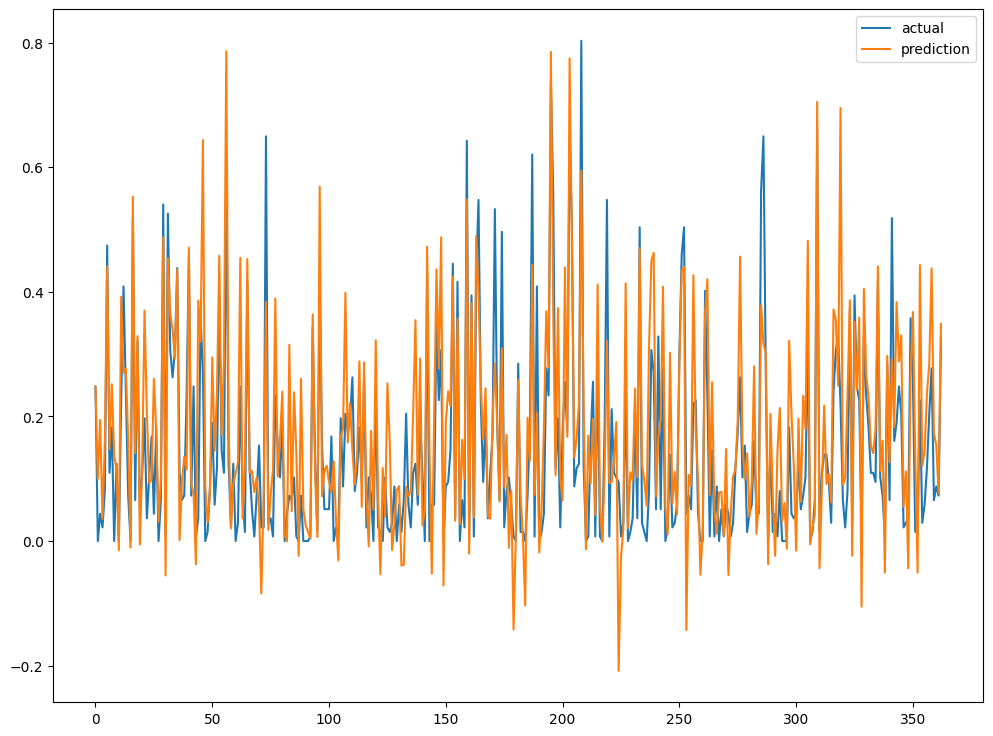

(363, 1)

In [ ]:


class GRU_CNN_Model(tf.keras.Model):
    def __init__(self, name=None):
        super(GRU_CNN_Model, self).__init__()

        self.GRU_layer1 = Sequential([
          GRU(6, return_sequences=True),
          GRU(32, return_sequences=True),
          BatchNormalization(synchronized=True),
        ])

        self.CNN_layer1 = Sequential([
          Conv1D(6, (3), activation='relu'),
          Conv1D(32, (3), activation='relu'),
          BatchNormalization(synchronized=True),
        ])


        self.Fc = Sequential([
            Flatten(),
            Dense(20*32, activation='relu'),
            Dense(1)
        ])

    def call(self, inputs):

        x = self.GRU_layer1(inputs)
        x1 = self.CNN_layer1(inputs)
        x = Concatenate(axis=1)([x, x1])
        print(x.shape)
        return self.Fc(x)

#분리된 데이터 확인
print(" X_train.shape : " , New_X_train.shape)
print(" y_train.shape : ", New_y_train.shape)

print(" X_test.shape : ", New_X_test.shape)
print(" y_test.shape : ", New_y_test.shape)


GRU_CNN_Models = GRU_CNN_Model()



early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = '/content/drive/MyDrive/temproject'
filename = os.path.join(model_path, 'LSTM_CNN_Model.tf')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
GRU_CNN_Models.compile(loss='mean_squared_error', optimizer='adam')
history = GRU_CNN_Models.fit(New_X_train, New_y_train,
                                    epochs=200,
                                    batch_size=16,
                                    validation_split=0.20,
                                    callbacks=[early_stop, checkpoint])

# Evaluate the model
print("\n Test Mse_loss:" , GRU_CNN_Models.evaluate(New_X_test, New_y_test))

GRU_CNN_Models.load_weights(filename)
pred = GRU_CNN_Models.predict(New_X_test)

plt.figure(figsize=(12, 9))
plt.plot(New_y_test, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()
pred.shape


오히려 성능이 대폭 감소한것을 알 수 있다.
따라서 피쳐를 합치는 방법보다 GRU에 attention 기법을 사용하여 성능 향상을 기대해보도록 하겠다

In [32]:
!pip install attention

 X_train.shape :  (1089, 12, 6)
 y_train.shape :  (1089,)
 X_test.shape :  (363, 12, 6)
 y_test.shape :  (363,)
Epoch 1/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0477
Epoch 1: val_loss improved from inf to 0.02583, saving model to /content/drive/MyDrive/temproject/best_GRUModuleAttention.tf


28/28 [==============================] - 17s 360ms/step - loss: 0.0477 - val_loss: 0.0258
Epoch 2/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0253
Epoch 2: val_loss improved from 0.02583 to 0.01894, saving model to /content/drive/MyDrive/temproject/best_GRUModuleAttention.tf


28/28 [==============================] - 7s 254ms/step - loss: 0.0253 - val_loss: 0.0189
Epoch 3/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0208
Epoch 3: val_loss improved from 0.01894 to 0.01885, saving model to /content/drive/MyDrive/temproject/best_GRUModuleAttention.tf


28/28 [==============================] - 9s 315ms/step - loss: 0.0207 - val_loss: 0.0188
Epoch 4/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0204
Epoch 4: val_loss improved from 0.01885 to 0.01847, saving model to /content/drive/MyDrive/temproject/best_GRUModuleAttention.tf


28/28 [==============================] - 10s 351ms/step - loss: 0.0203 - val_loss: 0.0185
Epoch 5/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0187
Epoch 5: val_loss improved from 0.01847 to 0.01583, saving model to /content/drive/MyDrive/temproject/best_GRUModuleAttention.tf


28/28 [==============================] - 9s 325ms/step - loss: 0.0190 - val_loss: 0.0158
Epoch 6/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0196
Epoch 6: val_loss did not improve from 0.01583
28/28 [==============================] - 1s 31ms/step - loss: 0.0196 - val_loss: 0.0161
Epoch 7/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0186
Epoch 7: val_loss improved from 0.01583 to 0.01468, saving model to /content/drive/MyDrive/temproject/best_GRUModuleAttention.tf


28/28 [==============================] - 7s 251ms/step - loss: 0.0185 - val_loss: 0.0147
Epoch 8/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0148
Epoch 8: val_loss improved from 0.01468 to 0.01456, saving model to /content/drive/MyDrive/temproject/best_GRUModuleAttention.tf


28/28 [==============================] - 9s 319ms/step - loss: 0.0147 - val_loss: 0.0146
Epoch 9/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0152
Epoch 9: val_loss did not improve from 0.01456
28/28 [==============================] - 1s 30ms/step - loss: 0.0151 - val_loss: 0.0150
Epoch 10/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0148
Epoch 10: val_loss did not improve from 0.01456
28/28 [==============================] - 1s 30ms/step - loss: 0.0148 - val_loss: 0.0150
Epoch 11/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0141
Epoch 11: val_loss did not improve from 0.01456
28/28 [==============================] - 1s 30ms/step - loss: 0.0140 - val_loss: 0.0160
Epoch 12/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0135
Epoch 12: val_loss improved from 0.01456 to 0.01292, saving model to /content/drive/MyDrive/temproject/best_GRUModuleAttention.tf


28/28 [==============================] - 7s 247ms/step - loss: 0.0135 - val_loss: 0.0129
Epoch 13/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0129
Epoch 13: val_loss improved from 0.01292 to 0.01206, saving model to /content/drive/MyDrive/temproject/best_GRUModuleAttention.tf


28/28 [==============================] - 11s 412ms/step - loss: 0.0130 - val_loss: 0.0121
Epoch 14/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0136
Epoch 14: val_loss improved from 0.01206 to 0.01182, saving model to /content/drive/MyDrive/temproject/best_GRUModuleAttention.tf


28/28 [==============================] - 8s 283ms/step - loss: 0.0136 - val_loss: 0.0118
Epoch 15/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0119
Epoch 15: val_loss did not improve from 0.01182
28/28 [==============================] - 1s 51ms/step - loss: 0.0118 - val_loss: 0.0133
Epoch 16/200
28/28 [==============================] - ETA: 0s - loss: 0.0122
Epoch 16: val_loss improved from 0.01182 to 0.01149, saving model to /content/drive/MyDrive/temproject/best_GRUModuleAttention.tf


28/28 [==============================] - 8s 285ms/step - loss: 0.0122 - val_loss: 0.0115
Epoch 17/200
28/28 [==============================] - ETA: 0s - loss: 0.0132
Epoch 17: val_loss did not improve from 0.01149
28/28 [==============================] - 1s 32ms/step - loss: 0.0132 - val_loss: 0.0136
Epoch 18/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0114
Epoch 18: val_loss did not improve from 0.01149
28/28 [==============================] - 1s 31ms/step - loss: 0.0113 - val_loss: 0.0134
Epoch 19/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0116
Epoch 19: val_loss improved from 0.01149 to 0.01143, saving model to /content/drive/MyDrive/temproject/best_GRUModuleAttention.tf


28/28 [==============================] - 8s 300ms/step - loss: 0.0116 - val_loss: 0.0114
Epoch 20/200
28/28 [==============================] - ETA: 0s - loss: 0.0111
Epoch 20: val_loss did not improve from 0.01143
28/28 [==============================] - 1s 53ms/step - loss: 0.0111 - val_loss: 0.0129
Epoch 21/200
28/28 [==============================] - ETA: 0s - loss: 0.0113
Epoch 21: val_loss improved from 0.01143 to 0.01072, saving model to /content/drive/MyDrive/temproject/best_GRUModuleAttention.tf


28/28 [==============================] - 7s 259ms/step - loss: 0.0113 - val_loss: 0.0107
Epoch 22/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0110
Epoch 22: val_loss did not improve from 0.01072
28/28 [==============================] - 1s 30ms/step - loss: 0.0111 - val_loss: 0.0108
Epoch 23/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0111
Epoch 23: val_loss did not improve from 0.01072
28/28 [==============================] - 1s 30ms/step - loss: 0.0112 - val_loss: 0.0134
Epoch 24/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0107
Epoch 24: val_loss improved from 0.01072 to 0.01022, saving model to /content/drive/MyDrive/temproject/best_GRUModuleAttention.tf


28/28 [==============================] - 10s 384ms/step - loss: 0.0108 - val_loss: 0.0102
Epoch 25/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0116
Epoch 25: val_loss did not improve from 0.01022
28/28 [==============================] - 1s 34ms/step - loss: 0.0115 - val_loss: 0.0116
Epoch 26/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0110
Epoch 26: val_loss did not improve from 0.01022
28/28 [==============================] - 1s 35ms/step - loss: 0.0109 - val_loss: 0.0150
Epoch 27/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0110
Epoch 27: val_loss did not improve from 0.01022
28/28 [==============================] - 1s 35ms/step - loss: 0.0111 - val_loss: 0.0118
Epoch 28/200
27/28 [===========================>..] - ETA: 0s - loss: 0.0098
Epoch 28: val_loss did not improve from 0.01022
28/28 [==============================] - 1s 34ms/step - loss: 0.0098 - val_loss: 0.0116
Epoch 29/200
27/28 [===========================>..] - ETA:

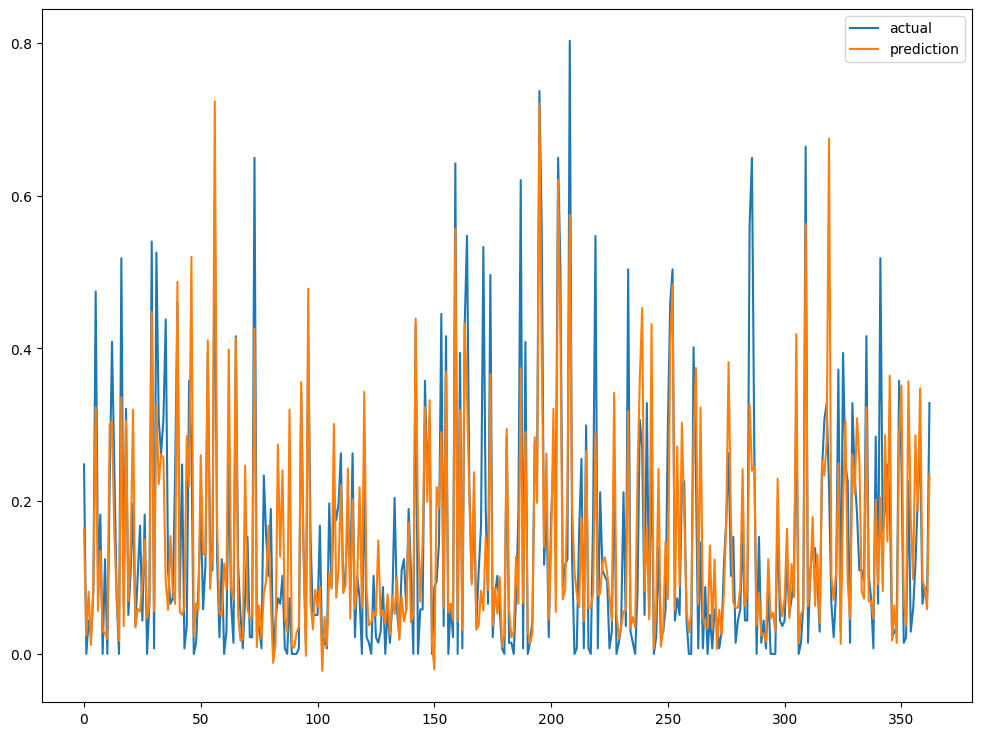

In [ ]:
from attention import Attention
class GRUModuleAttention(tf.keras.Model):
    def __init__(self, name=None):
        super(GRUModuleAttention, self).__init__(name=name)
        self.GRU_layer1 = Sequential([
            GRU(32, kernel_initializer='he_normal',return_sequences=True,recurrent_dropout=0.3),
            GRU(64, kernel_initializer='he_normal',return_sequences=True,recurrent_dropout=0.3),
            Attention(),
        ])

        self.Fc = Sequential([
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.25),
            Dense(64, activation='relu'),
            Dense(1)
        ])
    def call(self, inputs):
        x = self.GRU_layer1(inputs)

        x = self.Fc(x)

        return x



#분리된 데이터 확인
print(" X_train.shape : " , New_X_train.shape)
print(" y_train.shape : ", New_y_train.shape)

print(" X_test.shape : ", New_X_test.shape)
print(" y_test.shape : ", New_y_test.shape)

GRUModuleAttention = GRUModuleAttention()

# 콜백 및 모델 컴파일
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model_path = '/content/drive/MyDrive/temproject'
filename = os.path.join(model_path, 'best_GRUModuleAttention.tf')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
GRUModuleAttention.compile(loss='mean_squared_error', optimizer='adam')

# 학습
history = GRUModuleAttention.fit(New_X_train, New_y_train,
                                    epochs=200,
                                    batch_size=32,
                                    validation_split=0.20,
                                    callbacks=[early_stop, checkpoint])

# 모델 평가
print("\n Test Mse_loss:", GRUModuleAttention.evaluate(New_X_test, New_y_test))

# 가중치 로드
GRUModuleAttention.load_weights(filename)

# 예측 및 시각화
pred = GRUModuleAttention.predict(New_X_test)

plt.figure(figsize=(12, 9))
plt.plot(New_y_test, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

 X_train.shape :  (1089, 12, 6)
 y_train.shape :  (1089,)
 X_test.shape :  (363, 12, 6)
 y_test.shape :  (363,)
Epoch 1/200
42/55 [=====================>........] - ETA: 0s - loss: 0.0367
Epoch 1: val_loss improved from inf to 0.02836, saving model to /content/drive/MyDrive/temproject/best_CNNModel2.tf
55/55 [==============================] - 3s 30ms/step - loss: 0.0347 - val_loss: 0.0284
Epoch 2/200
41/55 [=====================>........] - ETA: 0s - loss: 0.0241
Epoch 2: val_loss improved from 0.02836 to 0.02229, saving model to /content/drive/MyDrive/temproject/best_CNNModel2.tf
55/55 [==============================] - 1s 23ms/step - loss: 0.0234 - val_loss: 0.0223
Epoch 3/200
44/55 [=======================>......] - ETA: 0s - loss: 0.0223
Epoch 3: val_loss improved from 0.02229 to 0.01856, saving model to /content/drive/MyDrive/temproject/best_CNNModel2.tf
55/55 [==============================] - 1s 25ms/step - loss: 0.0207 - val_loss: 0.0186
Epoch 4/200
44/55 [=====================

55/55 [==============================] - 4s 81ms/step - loss: 0.0125 - val_loss: 0.0130
Epoch 11/200
41/55 [=====================>........] - ETA: 0s - loss: 0.0136
Epoch 11: val_loss did not improve from 0.01301
55/55 [==============================] - 0s 4ms/step - loss: 0.0129 - val_loss: 0.0130
Epoch 12/200
39/55 [====================>.........] - ETA: 0s - loss: 0.0116
Epoch 12: val_loss improved from 0.01301 to 0.01251, saving model to /content/drive/MyDrive/temproject/best_CNNModel2.tf
55/55 [==============================] - 1s 25ms/step - loss: 0.0115 - val_loss: 0.0125
Epoch 13/200
42/55 [=====================>........] - ETA: 0s - loss: 0.0106
Epoch 13: val_loss improved from 0.01251 to 0.01220, saving model to /content/drive/MyDrive/temproject/best_CNNModel2.tf
55/55 [==============================] - 1s 25ms/step - loss: 0.0105 - val_loss: 0.0122
Epoch 14/200
42/55 [=====================>........] - ETA: 0s - loss: 0.0116
Epoch 14: val_loss improved from 0.01220 to 0.01122

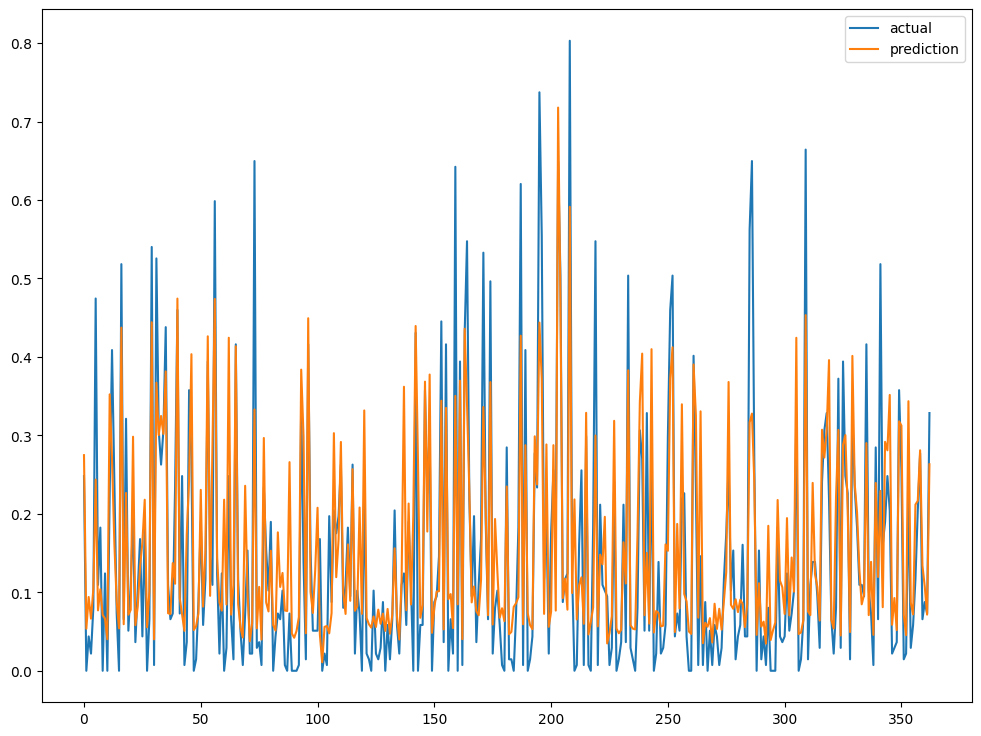

In [ ]:
class CNNModule2(tf.keras.Model):
    def __init__(self, name=None):
        super(CNNModule2, self).__init__(name=name)
        self.CNN_layer1 = Sequential([
            Conv1D(6, (5), activation='relu'),
            Conv1D(32, (5), activation='relu')
        ])

        self.Fc = Sequential([
            Flatten(),
            Dense(32, activation='relu'),
            Dropout(0.25),
            Dense(32, activation='relu'),
            Dense(1)
        ])
    def call(self, inputs):
        x = self.CNN_layer1(inputs)

        x = self.Fc(x)

        return x

#분리된 데이터 확인
print(" X_train.shape : " , New_X_train.shape)
print(" y_train.shape : ", New_y_train.shape)

print(" X_test.shape : ", New_X_test.shape)
print(" y_test.shape : ", New_y_test.shape)

CNNModel2 = CNNModule2()

# 콜백 및 모델 컴파일
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model_path = '/content/drive/MyDrive/temproject'
filename = os.path.join(model_path, 'best_CNNModel2.tf')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
CNNModel2.compile(loss='mean_squared_error', optimizer='adam')

# 학습
history = CNNModel2.fit(New_X_train, New_y_train,
                                    epochs=200,
                                    batch_size=16,
                                    validation_split=0.20,
                                    callbacks=[early_stop, checkpoint])

# 모델 평가
print("\n Test Mse_loss:", CNNModel2.evaluate(New_X_test, New_y_test))

# 가중치 로드
CNNModel2.load_weights(filename)

# 예측 및 시각화
pred = CNNModel2.predict(New_X_test)

plt.figure(figsize=(12, 9))
plt.plot(New_y_test, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

가장 성능이 좋은 1D-CNN에 attention을 추가해보도록 하겠습니다.

 X_train.shape :  (1089, 12, 6)
 y_train.shape :  (1089,)
 X_test.shape :  (363, 12, 6)
 y_test.shape :  (363,)
Epoch 1/200
43/55 [======================>.......] - ETA: 0s - loss: 0.0612
Epoch 1: val_loss improved from inf to 0.03244, saving model to /content/drive/MyDrive/temproject/best_AttentionCNNModule2.tf
55/55 [==============================] - 10s 57ms/step - loss: 0.0540 - val_loss: 0.0324
Epoch 2/200
43/55 [======================>.......] - ETA: 0s - loss: 0.0335
Epoch 2: val_loss improved from 0.03244 to 0.03061, saving model to /content/drive/MyDrive/temproject/best_AttentionCNNModule2.tf


55/55 [==============================] - 3s 63ms/step - loss: 0.0332 - val_loss: 0.0306
Epoch 3/200
42/55 [=====================>........] - ETA: 0s - loss: 0.0317
Epoch 3: val_loss improved from 0.03061 to 0.02925, saving model to /content/drive/MyDrive/temproject/best_AttentionCNNModule2.tf
55/55 [==============================] - 3s 55ms/step - loss: 0.0314 - val_loss: 0.0293
Epoch 4/200
52/55 [===========================>..] - ETA: 0s - loss: 0.0306
Epoch 4: val_loss improved from 0.02925 to 0.02700, saving model to /content/drive/MyDrive/temproject/best_AttentionCNNModule2.tf
55/55 [==============================] - 4s 78ms/step - loss: 0.0301 - val_loss: 0.0270
Epoch 5/200
54/55 [============================>.] - ETA: 0s - loss: 0.0264
Epoch 5: val_loss improved from 0.02700 to 0.02508, saving model to /content/drive/MyDrive/temproject/best_AttentionCNNModule2.tf
55/55 [==============================] - 4s 75ms/step - loss: 0.0263 - val_loss: 0.0251
Epoch 6/200
51/55 [===========

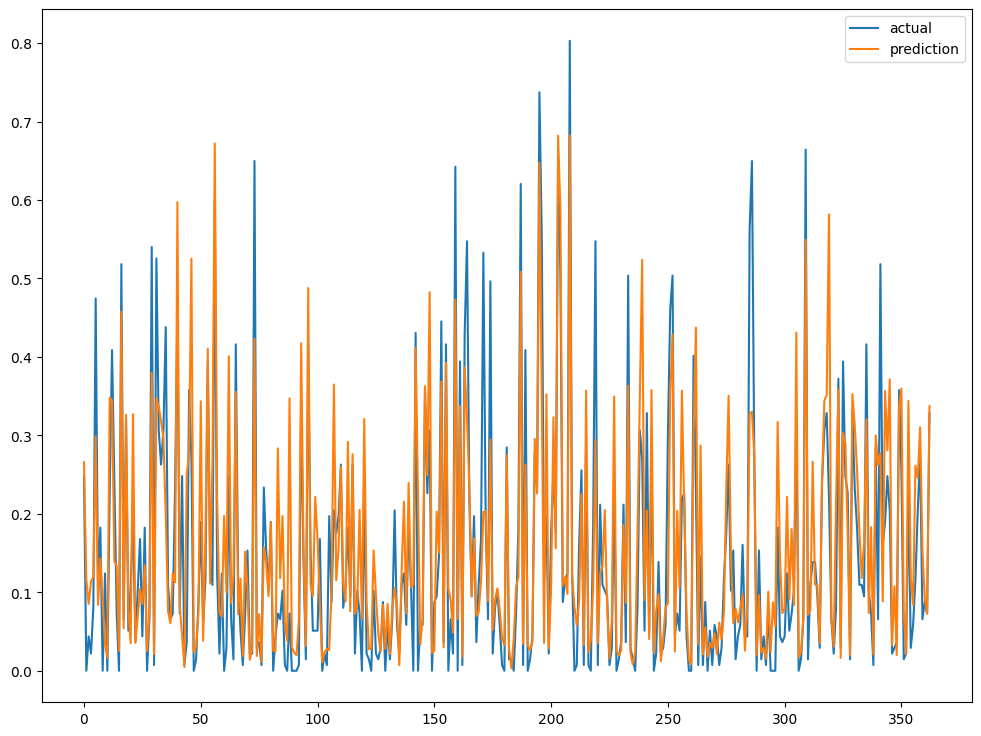

In [57]:
class AttentionCNNModule2(tf.keras.Model):
    def __init__(self, name=None):
        super(AttentionCNNModule2, self).__init__(name=name)
        self.CNN_layer1 = Sequential([
            Conv1D(6, (5), activation='relu'),
            Dropout(0.25),
            Conv1D(32, (5), activation='relu'),
        ])

        self.CNN_layer2 = Sequential([
            Conv1D(6, (5), activation='relu'),
            Dropout(0.25),
            Conv1D(32, (5), activation='softmax'),
        ])

        self.CNN_layer3 = Sequential([
            Conv1D(6, (3), activation='relu'),
            Dropout(0.25),
            Conv1D(6, (3), activation='relu'),
            Dropout(0.25),
            Conv1D(32, (3), activation='relu'),
            Dropout(0.25),
            Conv1D(32, (3), activation='softmax'),
        ])

        self.Fc = Sequential([
            Flatten(),
            Dense(64, activation='relu'),
            Dropout(0.25),
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(1)
        ])
    def call(self, inputs):

        x = self.CNN_layer1(inputs) + self.CNN_layer2(inputs)
        x2 = self.CNN_layer1(inputs) + self.CNN_layer3(inputs)

        x = x + x2

        x = self.Fc(x)

        return x

#분리된 데이터 확인
print(" X_train.shape : " , New_X_train.shape)
print(" y_train.shape : ", New_y_train.shape)

print(" X_test.shape : ", New_X_test.shape)
print(" y_test.shape : ", New_y_test.shape)

AttentionCNNModule2 = AttentionCNNModule2()

# 콜백 및 모델 컴파일
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model_path = '/content/drive/MyDrive/temproject'
filename = os.path.join(model_path, 'best_AttentionCNNModule2.tf')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
AttentionCNNModule2.compile(loss='mean_squared_error', optimizer='adam')

# 학습
history = AttentionCNNModule2.fit(New_X_train, New_y_train,
                                    epochs=200,
                                    batch_size=16,
                                    validation_split=0.20,
                                    callbacks=[early_stop, checkpoint])

# 모델 평가
print("\n Test Mse_loss:", AttentionCNNModule2.evaluate(New_X_test, New_y_test))

# 가중치 로드
AttentionCNNModule2.load_weights(filename)

# 예측 및 시각화
pred = AttentionCNNModule2.predict(New_X_test)


plt.figure(figsize=(12, 9))
plt.plot(New_y_test, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

위 플롯은 예측 값이 정규화되어 있기 때문에 정규화를 풀어 실제 값을 나타내는 플롯을 작성해보았습니다.

최종적으로 위 모델이 가장 낮은 Loss를 가짐으로써 가장 좋은 모델이라고 생각합니다
위 모델은 5크기의 커널과 3크기의 커널을 동시에 사용하여 피쳐를 생성함으로써
넓은 시점과 상대적으로 짧은 시점을 함께 볼 수 있도록 하였습니다.

각 모델의 loss는 각 모델마다 하나씩 나오지만 가끔 폰트 오류로 인해 스크롤을 올려야 확인이 가능한 경우가 있습니다.

따라서 loss가 보이지 않으시면 스크롤을 올려주시면 보실 수 있습니다.

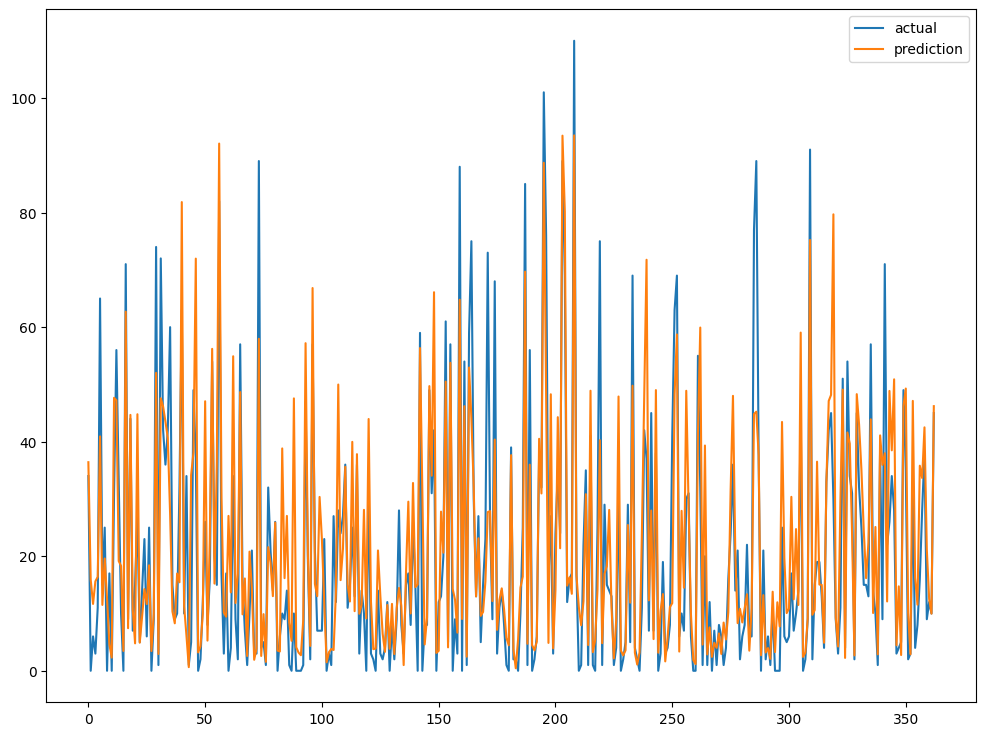

In [66]:

# 정규화를 푸는 함수
def reverse_normalize(data, min_val, max_val):
    return data * (max_val - min_val) + min_val

# 정규화를 푸는 과정
original_data = reverse_normalize(New_y_test, np.min(train_label, axis=0), np.max(train_label, axis=0))
pred_data = reverse_normalize(pred, np.min(train_label, axis=0), np.max(train_label, axis=0))
plt.figure(figsize=(12, 9))
plt.plot(original_data, label='actual')
plt.plot(pred_data, label='prediction')
plt.legend()
plt.show()
